# 2）相关系数法

In [1]:
import pandas as pd

advertising = pd.read_csv("data/advertising.csv")
advertising.drop(advertising.columns[0], axis=1, inplace=True)
advertising.dropna(inplace=True)
X = advertising.drop("Sales", axis=1)
y = advertising["Sales"]
# 计算皮尔逊相关系数
print(X.corrwith(y, method="pearson"))


TV           0.782224
Radio        0.576223
Newspaper    0.228299
dtype: float64


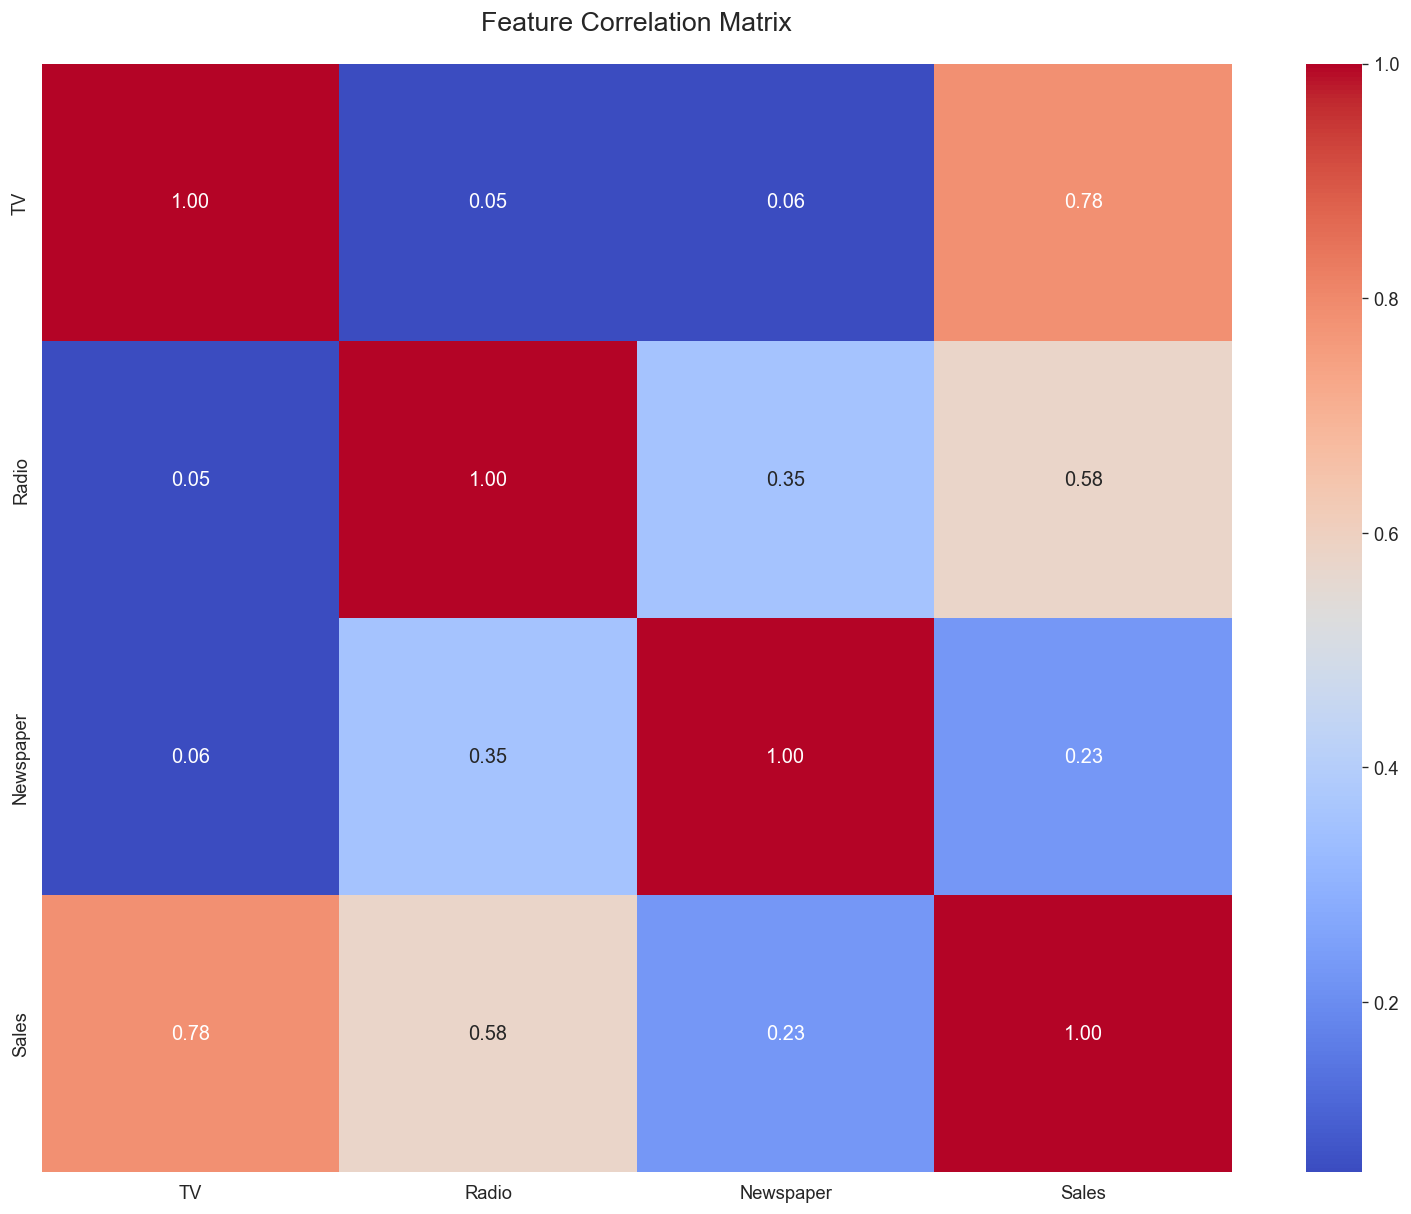

In [29]:
import seaborn as sns
import matplotlib.pyplot as plt

# 计算皮尔逊相关系数矩阵
corr_matrix = advertising.corr(method="pearson")
# 可视化热力图
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()


# 3）斯皮尔曼相关系数

In [30]:
import pandas as pd

# 每周学习时长
X = [[5], [8], [10], [12], [15], [3], [7], [9], [14], [6]]
# 数学考试成绩
y = [55, 65, 70, 75, 85, 50, 60, 72, 80, 58]
# 计算斯皮尔曼相关系数
X = pd.DataFrame(X)
y = pd.Series(y)
print(X.corrwith(y, method="spearman"))


0    0.987879
dtype: float64


# 4）主成分分析（PCA）

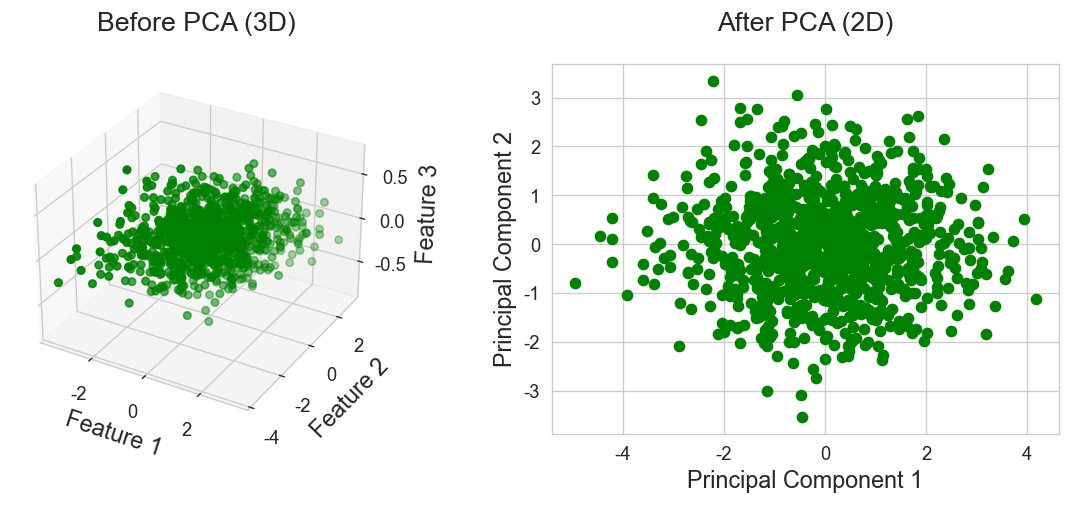

In [31]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

n_samples = 1000
# 第1个主成分方向
component1 = np.random.normal(0, 1, n_samples)
# 第2个主成分方向
component2 = np.random.normal(0, 0.2, n_samples)
# 第3个方向（噪声，方差较小）
noise = np.random.normal(0, 0.1, n_samples)
# 构造3维数据
X = np.vstack([component1 - component2, component1 + component2, component2 + noise]).T

# 标准化
scaler = StandardScaler()
X_standardized = scaler.fit_transform(X)

# 应用PCA，将3维数据降维到2维
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_standardized)
#X_pca是ndarray
# 可视化
# 转换前的3维数据可视化
fig = plt.figure(figsize=(12, 4))
ax1 = fig.add_subplot(121, projection="3d")
ax1.scatter(X[:, 0], X[:, 1], X[:, 2], c="g")
ax1.set_title("Before PCA (3D)")
ax1.set_xlabel("Feature 1")
ax1.set_ylabel("Feature 2")
ax1.set_zlabel("Feature 3")
# 转换后的2维数据可视化
ax2 = fig.add_subplot(122)
ax2.scatter(X_pca[:, 0], X_pca[:, 1], c="g")
ax2.set_title("After PCA (2D)")
ax2.set_xlabel("Principal Component 1")
ax2.set_ylabel("Principal Component 2")
plt.show()


# KNN

In [32]:
# 分类
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=2)  # KNN分类模型，K值为2
X = [[2, 1], [3, 1], [1, 4], [2, 6]]  # 特征
y = [0, 0, 1, 1]  # 标签
knn.fit(X, y)  # 模型训练
knn.predict([[4, 9]])  # 预测


array([1])

In [33]:
# 回归
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=2)  # KNN回归模型，K值为2
X = [[2, 1], [3, 1], [1, 4], [2, 6]]  # 特征
y = [0.5, 0.33, 4, 3]  # 标签
knn.fit(X, y)  # 模型训练
knn.predict([[4, 9]])  # 预测


array([3.5])

# 线性回归

In [34]:
from sklearn.linear_model import LinearRegression

# 自变量，每周学习时长
X = [[5], [8], [10], [12], [15], [3], [7], [9], [14], [6]]
# 因变量，数学考试成绩
y = [55, 65, 70, 75, 85, 50, 60, 72, 80, 58]
# 实例化线性回归模型
model = LinearRegression()
# 模型训练
model.fit(X, y)
# 系数，每周每学习1小时，成绩会增加多少分
print(model.coef_)
# 截距
print(model.intercept_)
# 预测,每周学习11小时，成绩可能是多少分
print(model.predict([[11]]))


[2.87070855]
41.45069393718042
[73.02848795]


# 逻辑回归

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression

# 加载数据集
heart_disease = pd.read_csv("data/heart_disease.csv")
heart_disease.dropna()

# 划分为训练集与测试集
X = heart_disease.drop("是否患有心脏病", axis=1)  # 特征
y = heart_disease["是否患有心脏病"]  # 标签
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=100)

# 特征工程
# 数值型特征
numerical_features = ["年龄", "静息血压", "胆固醇", "最大心率", "运动后的ST下降", "主血管数量"]
# 类别型特征
categorical_features = ["胸痛类型", "静息心电图结果", "峰值ST段的斜率", "地中海贫血"]
# 二元特征
binary_features = ["性别", "空腹血糖", "运动性心绞痛"]
# 创建列转换器
preprocessor = ColumnTransformer(
    transformers=[
        # 对数值型特征进行标准化
        ("num", StandardScaler(), numerical_features),
        # 对类别型特征进行独热编码，使用drop="first"避免多重共线性
        ("cat", OneHotEncoder(drop="first"), categorical_features),
        # 二元特征不进行处理
        ("binary", "passthrough", binary_features),
    ]
)
# 执行特征转换
x_train = preprocessor.fit_transform(x_train)  # 计算训练集的统计信息并进行转换
x_test = preprocessor.transform(x_test)  # 使用训练集计算的信息对测试集进行转换

# 模型训练
model = LogisticRegression()
model.fit(x_train, y_train)

# 模型评估，计算准确率
model.score(x_test, y_test)


0.8441558441558441

# k-means 聚类

D:\conda\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


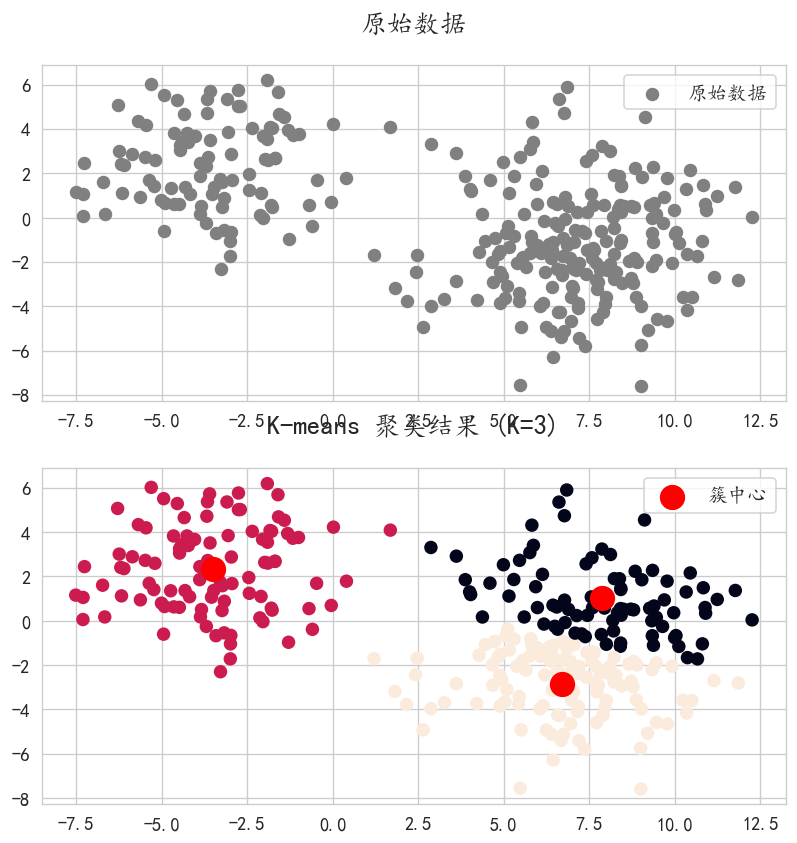

In [36]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.rcParams["font.sans-serif"] = ["KaiTi"]
plt.rcParams["axes.unicode_minus"] = False

# 使用 make_blobs 生成 3 个簇，每个簇 100 个点
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=2)

fig, ax = plt.subplots(2, figsize=(8, 8))
ax[0].scatter(X[:, 0], X[:, 1], s=50, c="gray", label="原始数据")
ax[0].set_title("原始数据")
ax[0].legend()

# 使用 K-Means 聚类
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)  # 预测每个点的簇标签
centers = kmeans.cluster_centers_  # 获取簇中心

ax[1].scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans)
ax[1].scatter(centers[:, 0], centers[:, 1], s=200, c="red", marker="o", label="簇中心")
ax[1].set_title("K-means 聚类结果 (K=3)")
ax[1].legend()
plt.show()


簇内平方和： 8580.737197961304
轮廓系数： 0.34589438297566866
CH指数： 201.7158189473072


D:\conda\envs\nlp\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


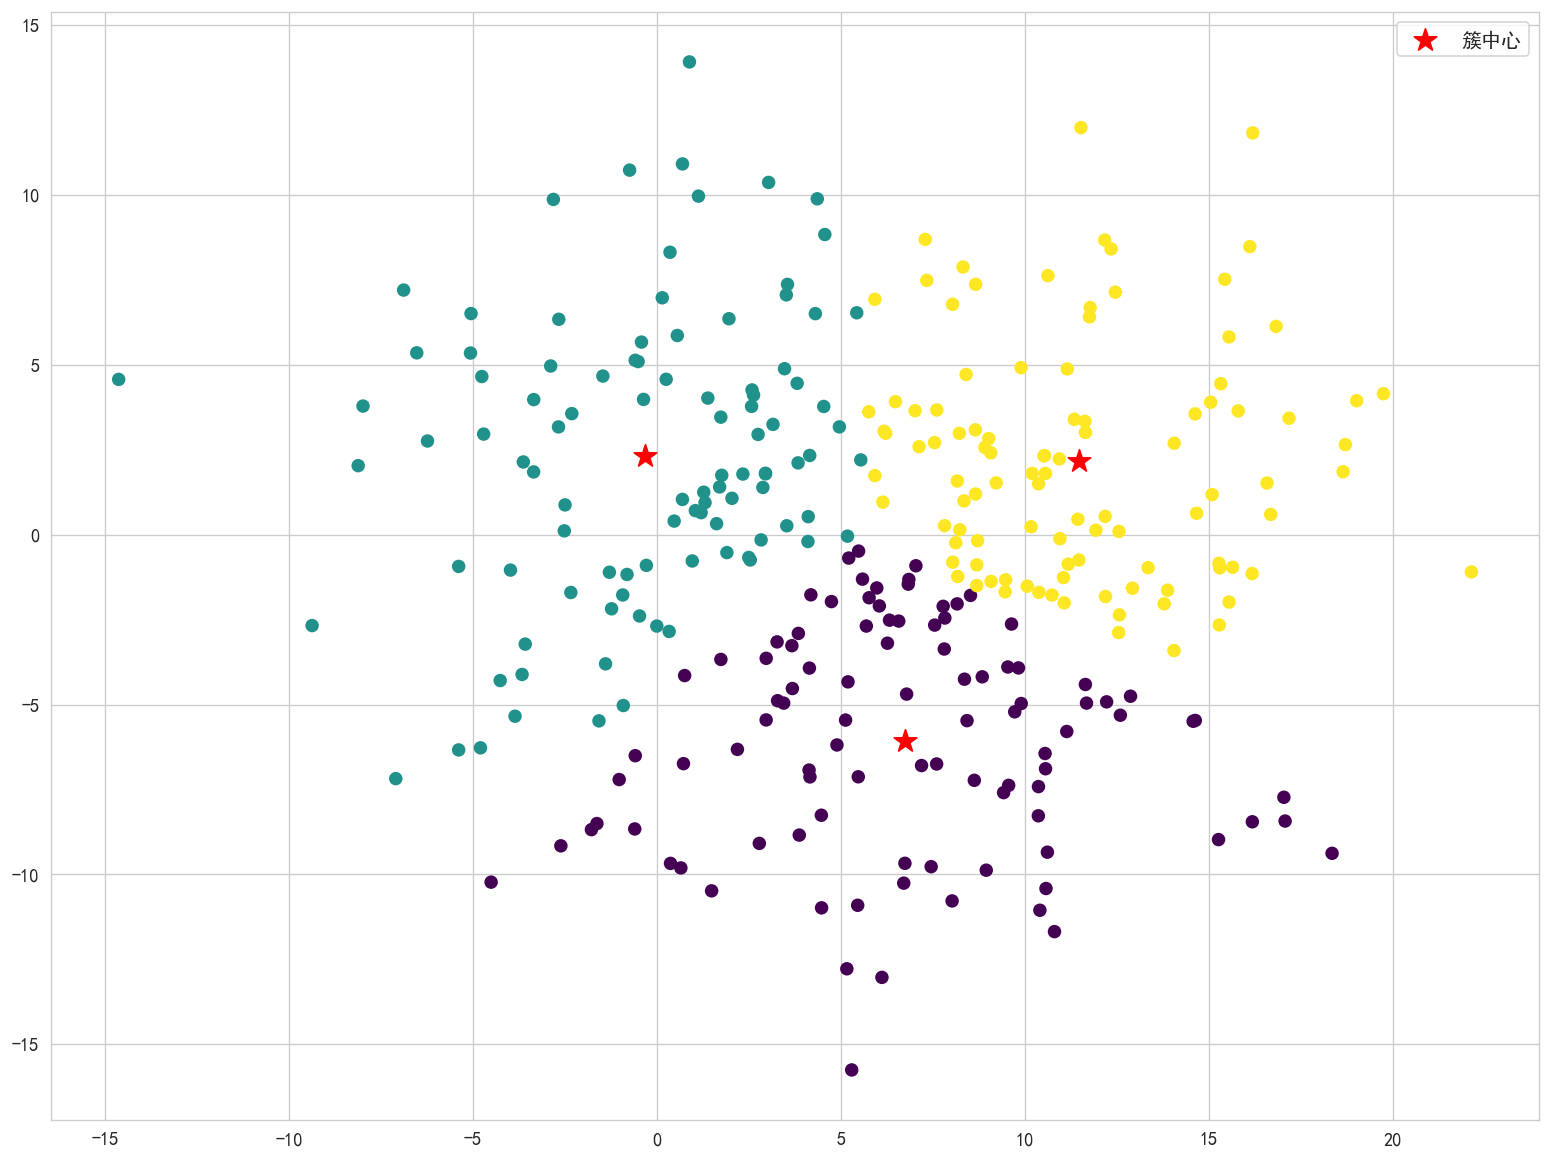

In [37]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_score, calinski_harabasz_score

plt.rcParams["font.sans-serif"] = ["SimHei"]
plt.rcParams["axes.unicode_minus"] = False

# 使用 make_blobs 生成 3 个簇，每个簇 100 个点
X, y_true = make_blobs(n_samples=300, centers=3, cluster_std=5)
# 使用 K-Means 聚类
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)  # 预测每个点的簇标签
centers = kmeans.cluster_centers_  # 获取簇中心
plt.scatter(X[:, 0], X[:, 1], s=50, c=y_kmeans, cmap="viridis")
plt.scatter(centers[:, 0], centers[:, 1], s=200, c="red", marker="*", label="簇中心")
plt.legend()
print("簇内平方和：", kmeans.inertia_)
print("轮廓系数：", silhouette_score(X, y_kmeans))
print("CH指数：", calinski_harabasz_score(X, y_kmeans))
plt.show()


# xgboost

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21388\3256107927.py:24: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 10))
C:\Users\Administrator\AppData\Local\Temp\ipykernel_21388\3256107927.py:173: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax5.boxplot(


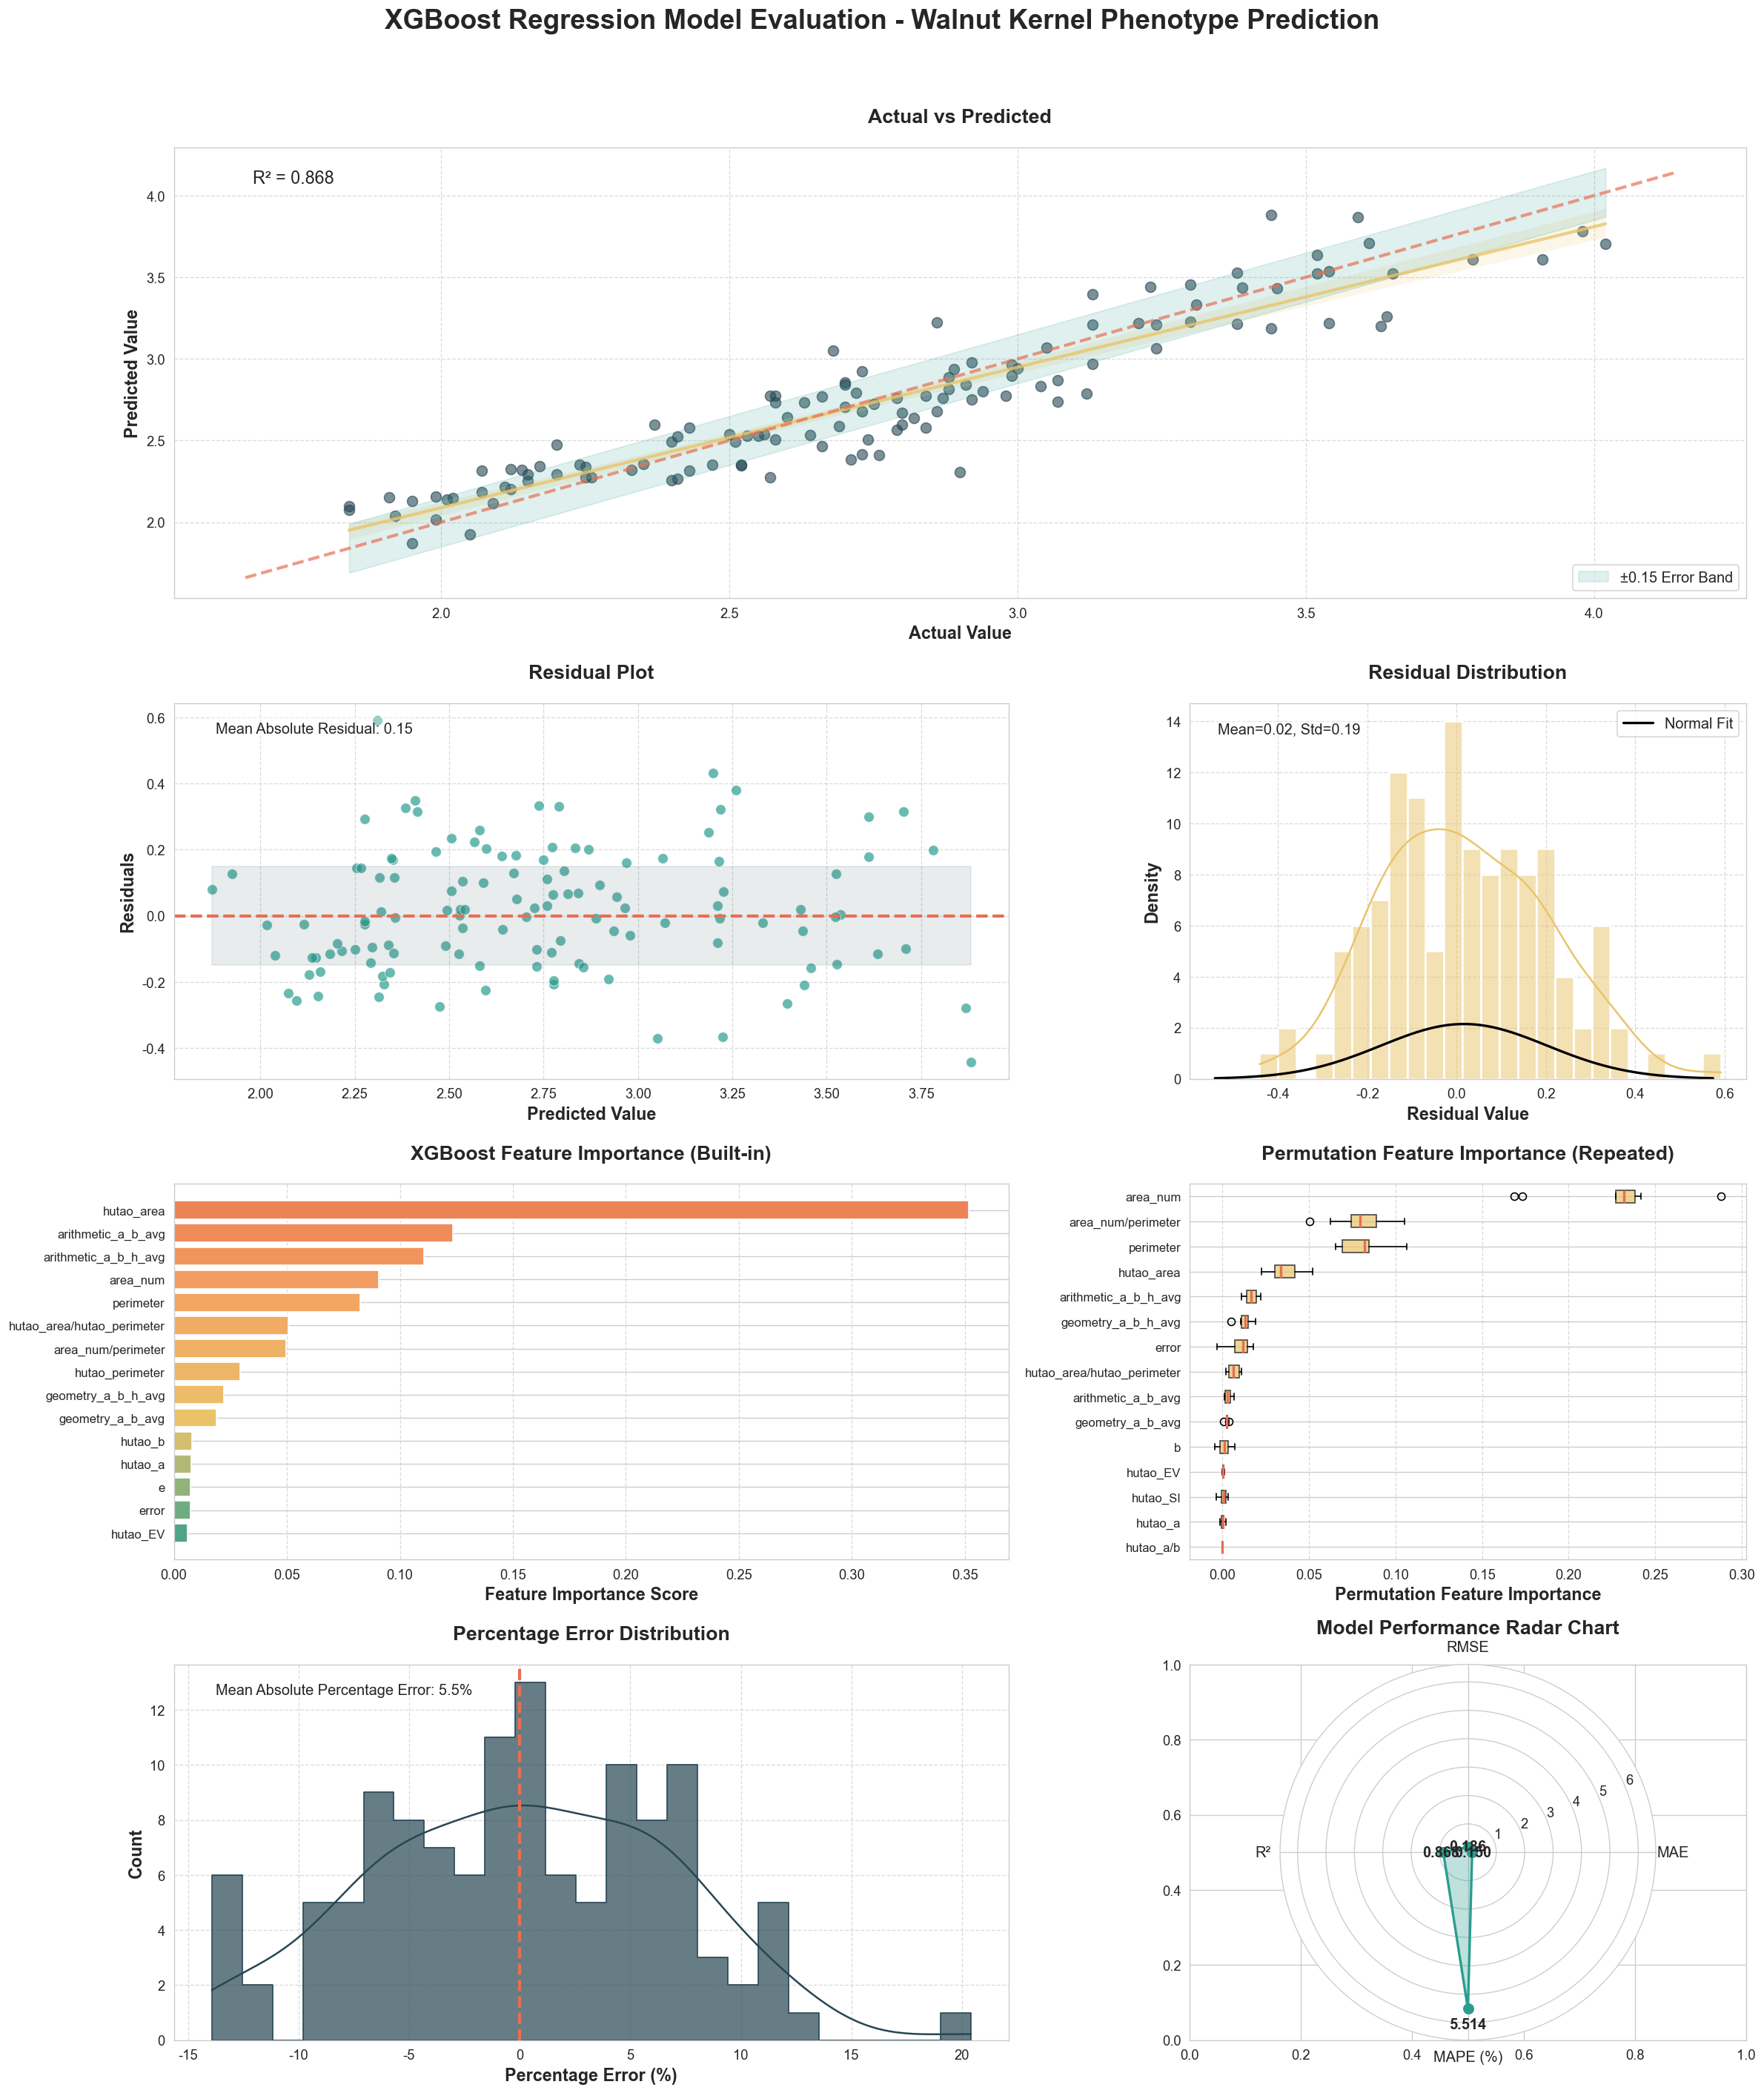

Model Performance Metrics:
     Metric     Value                                        Description
0       MAE  0.149759            Mean Absolute Error (smaller is better)
1       MSE  0.034544             Mean Squared Error (smaller is better)
2      RMSE  0.185859        Root Mean Squared Error (smaller is better)
3        R²  0.868121                R-squared (larger is better, max=1)
4  MAPE (%)  5.514284  Mean Absolute Percentage Error (smaller is bet...
Model saved as 'walnut_predictor.model'
Prediction results saved as 'prediction_results.csv'
Evaluation chart saved as 'xgboost_model_evaluation.png'


D:\conda\envs\nlp\Lib\site-packages\xgboost\sklearn.py:1028: UserWarning: [22:52:22] WARNING: C:\b\abs_d97hy_84m6\croot\xgboost-split_1749630932152\work\src\c_api\c_api.cc:1427: Saving model in the UBJSON format as default.  You can use file extension: `json`, `ubj` or `deprecated` to choose between formats.
  self.get_booster().save_model(fname)


In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec, rcParams, font_manager
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import scipy.stats as stats
import matplotlib.colors as mcolors
import os

# 设置图形风格和颜色主题
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.figsize'] = (16, 12)

# 创建自定义颜色映射
palette = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", palette)
colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 10))

# 1. 读取Excel数据
file_path = "核桃仁表型信息_重新标定.xlsx"
sheet_name = "Sheet1"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. 准备数据 - 移除文件名列（非数值特征）
X = df.drop(columns=['g', 'filename'])
y = df['g']

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练XGBoost模型
model = xgb.XGBRegressor(
    n_estimators=150,
    learning_rate=0.08,
    max_depth=5,
    subsample=0.8,
    colsample_bytree=0.9,
    random_state=42
)

model.fit(X_train, y_train)

# 5. 预测与评估
y_pred = model.predict(X_test)

# 计算评估指标
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Value': [mae, mse, rmse, r2, mape],
    'Description': [
        'Mean Absolute Error (smaller is better)',
        'Mean Squared Error (smaller is better)',
        'Root Mean Squared Error (smaller is better)',
        'R-squared (larger is better, max=1)',
        'Mean Absolute Percentage Error (smaller is better)'
    ]
})

# 创建复杂的多面板图表
fig = plt.figure(figsize=(20, 24))
gs = gridspec.GridSpec(4, 2, height_ratios=[1.2, 1, 1, 1], width_ratios=[1.5, 1])
plt.subplots_adjust(wspace=0.3, hspace=0.6)

# 面板1: 实际值与预测值对比 (带有置信区间)
ax1 = plt.subplot(gs[0, :])
sns.regplot(
    x=y_test, y=y_pred,
    scatter_kws={'alpha': 0.6, 'color': palette[0], 's': 70},
    line_kws={'color': palette[2], 'lw': 2.5, 'alpha': 0.8}
)

# 添加趋势线和参考线
plt.plot([y.min(), y.max()], [y.min(), y.max()],
         '--', color=palette[4], lw=2.5, alpha=0.7)

# 计算误差带
x = np.linspace(y_test.min(), y_test.max(), 100)
y_upper = x + mae
y_lower = x - mae
plt.fill_between(x, y_lower, y_upper, color=palette[1], alpha=0.15, label=f'±{mae:.2f} Error Band')

ax1.set_xlabel('Actual Value', fontsize=14, fontweight='bold')
ax1.set_ylabel('Predicted Value', fontsize=14, fontweight='bold')
ax1.set_title('Actual vs Predicted', fontsize=16, fontweight='bold')
ax1.text(0.05, 0.95, f'R² = {r2:.3f}', transform=ax1.transAxes,
         fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.3, facecolor='white'))
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 面板2: 残差分析
ax2 = plt.subplot(gs[1, 0])
residuals = y_test - y_pred
sns.scatterplot(
    x=y_pred, y=residuals,
    alpha=0.7,
    color=palette[1],
    s=70,
    ax=ax2
)

# 添加水平线和误差带
plt.axhline(y=0, color=palette[4], linestyle='--', lw=2.5)
plt.fill_between([y_pred.min(), y_pred.max()], -mae, mae, color=palette[0], alpha=0.1)

ax2.set_xlabel('Predicted Value', fontsize=14, fontweight='bold')
ax2.set_ylabel('Residuals', fontsize=14, fontweight='bold')
ax2.set_title('Residual Plot', fontsize=16, fontweight='bold')
ax2.text(0.05, 0.95, f'Mean Absolute Residual: {np.mean(np.abs(residuals)):.2f}',
         transform=ax2.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', alpha=0.3, facecolor='white'))
ax2.grid(True, linestyle='--', alpha=0.7)

# 面板3: 残差分布
ax3 = plt.subplot(gs[1, 1])
sns.histplot(
    residuals, kde=True,
    color=palette[2],
    edgecolor='w',
    linewidth=1.5,
    bins=25,
    ax=ax3
)

# 添加统计信息
mu, std = residuals.mean(), residuals.std()
x = np.linspace(mu - 3*std, mu + 3*std, 100)
p = stats.norm.pdf(x, mu, std)
ax3.plot(x, p, 'k', linewidth=2, label='Normal Fit')

ax3.set_xlabel('Residual Value', fontsize=14, fontweight='bold')
ax3.set_ylabel('Density', fontsize=14, fontweight='bold')
ax3.set_title('Residual Distribution', fontsize=16, fontweight='bold')
ax3.text(0.05, 0.95, f'Mean={mu:.2f}, Std={std:.2f}',
         transform=ax3.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', alpha=0.3, facecolor='white'))
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.7)

# 面板4: 特征重要性 (XGBoost内置)
ax4 = plt.subplot(gs[2, 0])
importances = model.feature_importances_
sorted_idx = np.argsort(importances)[-15:]  # 只显示最重要的15个特征
ax4.barh(range(len(sorted_idx)), importances[sorted_idx],
         color=cmap(np.linspace(0.3, 0.9, len(sorted_idx))))
ax4.set_yticks(range(len(sorted_idx)))
ax4.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
ax4.set_xlabel('Feature Importance Score', fontsize=14, fontweight='bold')
ax4.set_title('XGBoost Feature Importance (Built-in)', fontsize=16, fontweight='bold')
ax4.grid(True, axis='x', linestyle='--', alpha=0.7)

# 面板5: 置换特征重要性
ax5 = plt.subplot(gs[2, 1])
result = permutation_importance(
    model, X_test, y_test, n_repeats=10, random_state=42
)
perm_sorted_idx = result.importances_mean.argsort()[-15:]  # 只显示最重要的15个特征
ax5.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
    patch_artist=True,
    boxprops=dict(facecolor=palette[2], alpha=0.7),
    medianprops=dict(color=palette[4], linewidth=2)
)
ax5.set_xlabel('Permutation Feature Importance', fontsize=14, fontweight='bold')
ax5.set_title('Permutation Feature Importance (Repeated)', fontsize=16, fontweight='bold')
ax5.grid(True, axis='x', linestyle='--', alpha=0.7)

# 调整特征名称的字体大小
for tick in ax5.get_yticklabels():
    tick.set_fontsize(10)

# 面板6: 误差分布图
ax6 = plt.subplot(gs[3, 0])
error_percentage = (residuals / y_test) * 100
sns.histplot(
    error_percentage,
    color=palette[0],
    kde=True,
    bins=25,
    element='step',
    fill=True,
    alpha=0.7,
    ax=ax6
)
ax6.axvline(0, color=palette[4], linestyle='--', linewidth=2.5)
ax6.set_xlabel('Percentage Error (%)', fontsize=14, fontweight='bold')
ax6.set_ylabel('Count', fontsize=14, fontweight='bold')
ax6.set_title('Percentage Error Distribution', fontsize=16, fontweight='bold')
ax6.text(0.05, 0.95, f'Mean Absolute Percentage Error: {mape:.1f}%',
         transform=ax6.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', alpha=0.3, facecolor='white'))
ax6.grid(True, linestyle='--', alpha=0.7)

# 面板7: 模型性能比较
ax7 = plt.subplot(gs[3, 1])
metrics = ['MAE', 'RMSE', 'R²', 'MAPE (%)']
values = [mae, rmse, r2, mape]

# 创建雷达图
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
values += values[:1]  # 闭合图形
angles = np.append(angles, angles[0])

ax7 = plt.subplot(gs[3, 1], polar=True)
ax7.fill(angles, values, color=palette[1], alpha=0.3)
ax7.plot(angles, values, color=palette[1], linewidth=2, marker='o', markersize=8)

# 设置角度标记
ax7.set_xticks(angles[:-1])
ax7.set_xticklabels(metrics, fontsize=12)

# 设置半径范围
ylim = max(values) * 1.2
ax7.set_ylim(0, ylim)

# 添加数值标签
for i, v in enumerate(values[:-1]):
    angle = angles[i]
    ax7.text(angle, v * 1.1, f'{v:.3f}', ha='center', va='center', fontsize=12, fontweight='bold')

ax7.set_title('Model Performance Radar Chart', fontsize=16, fontweight='bold', pad=25)

# 添加整体标题
fig.suptitle('XGBoost Regression Model Evaluation - Walnut Kernel Phenotype Prediction',
            fontsize=22, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('xgboost_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

# 打印评估指标
print("="*70)
print("Model Performance Metrics:")
print("="*70)
print(metrics_df)
print("="*70)

# 保存模型和预测结果
model.save_model('walnut_predictor.model')
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})
results_df.to_csv('prediction_results.csv', index=False)

print(f"Model saved as 'walnut_predictor.model'")
print(f"Prediction results saved as 'prediction_results.csv'")
print(f"Evaluation chart saved as 'xgboost_model_evaluation.png'")

# LightGBM

C:\Users\Administrator\AppData\Local\Temp\ipykernel_21388\4085897819.py:45: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 10))


Training LightGBM model...


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21388\4085897819.py:204: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  ax5.boxplot(


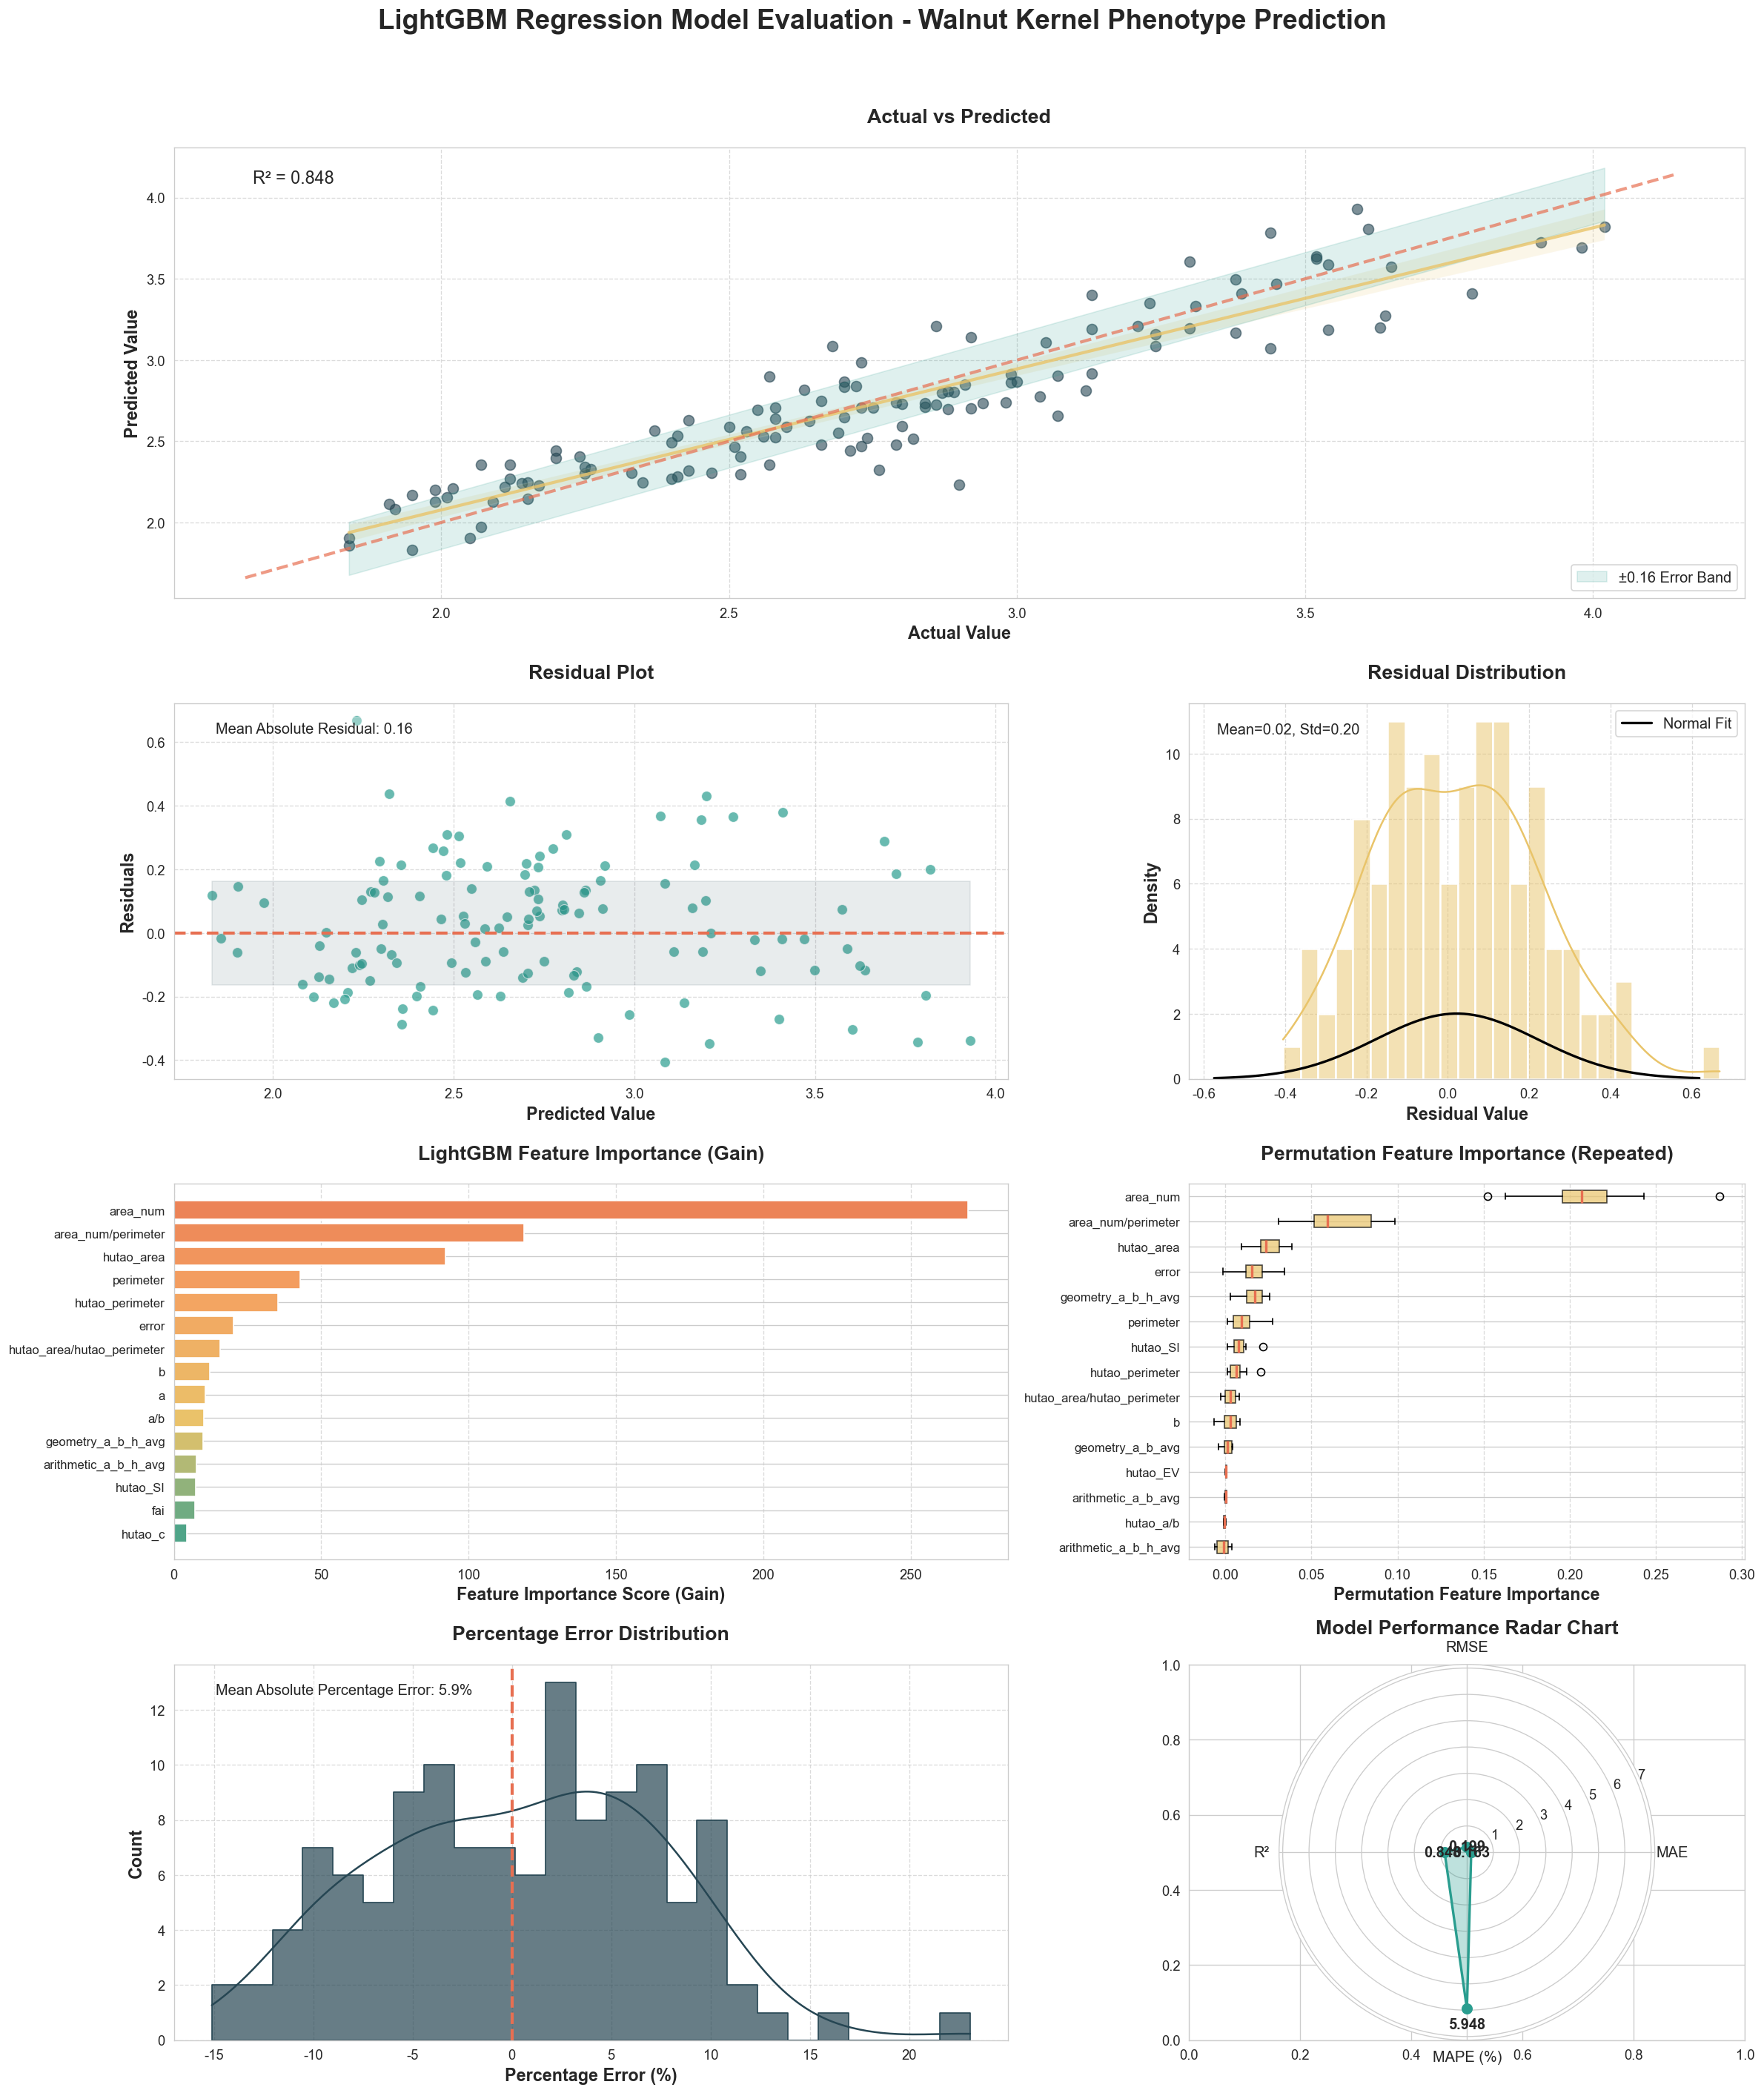

Model Performance Metrics:
     Metric     Value                                        Description
0       MAE  0.163339            Mean Absolute Error (smaller is better)
1       MSE  0.039705             Mean Squared Error (smaller is better)
2      RMSE  0.199261        Root Mean Squared Error (smaller is better)
3        R²  0.848417                R-squared (larger is better, max=1)
4  MAPE (%)  5.948428  Mean Absolute Percentage Error (smaller is bet...
Model saved as 'walnut_predictor_lightgbm.txt'
Prediction results saved as 'lightgbm_prediction_results.csv'
Evaluation chart saved as 'lightgbm_model_evaluation.png'


In [39]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec, rcParams
import seaborn as sns
import lightgbm as lgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.inspection import permutation_importance
import scipy.stats as stats
import matplotlib.colors as mcolors
from sklearn.base import BaseEstimator, RegressorMixin

# 创建LightGBM包装器类，使其兼容scikit-learn的permutation_importance
class LGBMWrapper(BaseEstimator, RegressorMixin):
    def __init__(self, **params):
        self.params = params
        self.model = None

    def fit(self, X, y):
        train_data = lgb.Dataset(X, label=y)
        self.model = lgb.train(
            self.params,
            train_data,
            num_boost_round=500,
        )
        return self

    def predict(self, X):
        return self.model.predict(X)

    def get_booster(self):
        return self.model

# 设置图形风格和颜色主题
sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['figure.figsize'] = (16, 12)

# 创建自定义颜色映射
palette = ["#264653", "#2a9d8f", "#e9c46a", "#f4a261", "#e76f51"]
cmap = mcolors.LinearSegmentedColormap.from_list("custom", palette)
colors = plt.cm.get_cmap('viridis')(np.linspace(0, 1, 10))

# 1. 读取Excel数据
file_path = "核桃仁表型信息_重新标定.xlsx"
sheet_name = "Sheet1"

df = pd.read_excel(file_path, sheet_name=sheet_name)

# 2. 准备数据 - 移除文件名列（非数值特征）
X = df.drop(columns=['g', 'filename'])
y = df['g']

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. 训练LightGBM模型
# 设置参数
params = {
    'objective': 'regression',
    'metric': 'rmse',
    'boosting_type': 'gbdt',
    'num_leaves': 31,
    'learning_rate': 0.08,
    'feature_fraction': 0.8,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'verbose': -1,
    'random_state': 42
}

# 使用包装器训练模型
print("Training LightGBM model...")
lgb_wrapper = LGBMWrapper(**params)
lgb_wrapper.fit(X_train, y_train)
model = lgb_wrapper.get_booster()

# 5. 预测与评估
y_pred = model.predict(X_test)

# 计算评估指标
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

metrics_df = pd.DataFrame({
    'Metric': ['MAE', 'MSE', 'RMSE', 'R²', 'MAPE (%)'],
    'Value': [mae, mse, rmse, r2, mape],
    'Description': [
        'Mean Absolute Error (smaller is better)',
        'Mean Squared Error (smaller is better)',
        'Root Mean Squared Error (smaller is better)',
        'R-squared (larger is better, max=1)',
        'Mean Absolute Percentage Error (smaller is better)'
    ]
})

# 创建复杂的多面板图表
fig = plt.figure(figsize=(20, 24))
gs = gridspec.GridSpec(4, 2, height_ratios=[1.2, 1, 1, 1], width_ratios=[1.5, 1])
plt.subplots_adjust(wspace=0.3, hspace=0.6)

# 面板1: 实际值与预测值对比 (带有置信区间)
ax1 = plt.subplot(gs[0, :])
sns.regplot(
    x=y_test, y=y_pred,
    scatter_kws={'alpha': 0.6, 'color': palette[0], 's': 70},
    line_kws={'color': palette[2], 'lw': 2.5, 'alpha': 0.8}
)

# 添加趋势线和参考线
plt.plot([y.min(), y.max()], [y.min(), y.max()],
         '--', color=palette[4], lw=2.5, alpha=0.7)

# 计算误差带
x = np.linspace(y_test.min(), y_test.max(), 100)
y_upper = x + mae
y_lower = x - mae
plt.fill_between(x, y_lower, y_upper, color=palette[1], alpha=0.15, label=f'±{mae:.2f} Error Band')

ax1.set_xlabel('Actual Value', fontsize=14, fontweight='bold')
ax1.set_ylabel('Predicted Value', fontsize=14, fontweight='bold')
ax1.set_title('Actual vs Predicted', fontsize=16, fontweight='bold')
ax1.text(0.05, 0.95, f'R² = {r2:.3f}', transform=ax1.transAxes,
         fontsize=14, verticalalignment='top', bbox=dict(boxstyle='round', alpha=0.3, facecolor='white'))
ax1.legend()
ax1.grid(True, linestyle='--', alpha=0.7)

# 面板2: 残差分析
ax2 = plt.subplot(gs[1, 0])
residuals = y_test - y_pred
sns.scatterplot(
    x=y_pred, y=residuals,
    alpha=0.7,
    color=palette[1],
    s=70,
    ax=ax2
)

# 添加水平线和误差带
plt.axhline(y=0, color=palette[4], linestyle='--', lw=2.5)
plt.fill_between([y_pred.min(), y_pred.max()], -mae, mae, color=palette[0], alpha=0.1)

ax2.set_xlabel('Predicted Value', fontsize=14, fontweight='bold')
ax2.set_ylabel('Residuals', fontsize=14, fontweight='bold')
ax2.set_title('Residual Plot', fontsize=16, fontweight='bold')
ax2.text(0.05, 0.95, f'Mean Absolute Residual: {np.mean(np.abs(residuals)):.2f}',
         transform=ax2.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', alpha=0.3, facecolor='white'))
ax2.grid(True, linestyle='--', alpha=0.7)

# 面板3: 残差分布
ax3 = plt.subplot(gs[1, 1])
sns.histplot(
    residuals, kde=True,
    color=palette[2],
    edgecolor='w',
    linewidth=1.5,
    bins=25,
    ax=ax3
)

# 添加统计信息
mu, std = residuals.mean(), residuals.std()
x = np.linspace(mu - 3*std, mu + 3*std, 100)
p = stats.norm.pdf(x, mu, std)
ax3.plot(x, p, 'k', linewidth=2, label='Normal Fit')

ax3.set_xlabel('Residual Value', fontsize=14, fontweight='bold')
ax3.set_ylabel('Density', fontsize=14, fontweight='bold')
ax3.set_title('Residual Distribution', fontsize=16, fontweight='bold')
ax3.text(0.05, 0.95, f'Mean={mu:.2f}, Std={std:.2f}',
         transform=ax3.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', alpha=0.3, facecolor='white'))
ax3.legend()
ax3.grid(True, linestyle='--', alpha=0.7)

# 面板4: 特征重要性 (LightGBM内置)
ax4 = plt.subplot(gs[2, 0])
importances = model.feature_importance(importance_type='gain')
sorted_idx = np.argsort(importances)[-15:]  # 只显示最重要的15个特征
ax4.barh(range(len(sorted_idx)), importances[sorted_idx],
         color=cmap(np.linspace(0.3, 0.9, len(sorted_idx))))
ax4.set_yticks(range(len(sorted_idx)))
ax4.set_yticklabels(np.array(X.columns)[sorted_idx], fontsize=10)
ax4.set_xlabel('Feature Importance Score (Gain)', fontsize=14, fontweight='bold')
ax4.set_title('LightGBM Feature Importance (Gain)', fontsize=16, fontweight='bold')
ax4.grid(True, axis='x', linestyle='--', alpha=0.7)

# 面板5: 置换特征重要性
ax5 = plt.subplot(gs[2, 1])
# 使用包装器计算置换特征重要性
result = permutation_importance(
    lgb_wrapper, X_test, y_test, n_repeats=10, random_state=42
)
perm_sorted_idx = result.importances_mean.argsort()[-15:]  # 只显示最重要的15个特征
ax5.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=np.array(X.columns)[perm_sorted_idx],
    patch_artist=True,
    boxprops=dict(facecolor=palette[2], alpha=0.7),
    medianprops=dict(color=palette[4], linewidth=2)
)
ax5.set_xlabel('Permutation Feature Importance', fontsize=14, fontweight='bold')
ax5.set_title('Permutation Feature Importance (Repeated)', fontsize=16, fontweight='bold')
ax5.grid(True, axis='x', linestyle='--', alpha=0.7)

# 调整特征名称的字体大小
for tick in ax5.get_yticklabels():
    tick.set_fontsize(10)

# 面板6: 误差分布图
ax6 = plt.subplot(gs[3, 0])
error_percentage = (residuals / y_test) * 100
sns.histplot(
    error_percentage,
    color=palette[0],
    kde=True,
    bins=25,
    element='step',
    fill=True,
    alpha=0.7,
    ax=ax6
)
ax6.axvline(0, color=palette[4], linestyle='--', linewidth=2.5)
ax6.set_xlabel('Percentage Error (%)', fontsize=14, fontweight='bold')
ax6.set_ylabel('Count', fontsize=14, fontweight='bold')
ax6.set_title('Percentage Error Distribution', fontsize=16, fontweight='bold')
ax6.text(0.05, 0.95, f'Mean Absolute Percentage Error: {mape:.1f}%',
         transform=ax6.transAxes, fontsize=12, verticalalignment='top',
         bbox=dict(boxstyle='round', alpha=0.3, facecolor='white'))
ax6.grid(True, linestyle='--', alpha=0.7)

# 面板7: 模型性能比较
ax7 = plt.subplot(gs[3, 1])
metrics = ['MAE', 'RMSE', 'R²', 'MAPE (%)']
values = [mae, rmse, r2, mape]

# 创建雷达图
angles = np.linspace(0, 2*np.pi, len(metrics), endpoint=False)
values += values[:1]  # 闭合图形
angles = np.append(angles, angles[0])

ax7 = plt.subplot(gs[3, 1], polar=True)
ax7.fill(angles, values, color=palette[1], alpha=0.3)
ax7.plot(angles, values, color=palette[1], linewidth=2, marker='o', markersize=8)

# 设置角度标记
ax7.set_xticks(angles[:-1])
ax7.set_xticklabels(metrics, fontsize=12)

# 设置半径范围
ylim = max(values) * 1.2
ax7.set_ylim(0, ylim)

# 添加数值标签
for i, v in enumerate(values[:-1]):
    angle = angles[i]
    ax7.text(angle, v * 1.1, f'{v:.3f}', ha='center', va='center', fontsize=12, fontweight='bold')

ax7.set_title('Model Performance Radar Chart', fontsize=16, fontweight='bold', pad=25)

# 添加整体标题
fig.suptitle('LightGBM Regression Model Evaluation - Walnut Kernel Phenotype Prediction',
            fontsize=22, fontweight='bold', y=0.98)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('lightgbm_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

# 打印评估指标
print("="*70)
print("Model Performance Metrics:")
print("="*70)
print(metrics_df)
print("="*70)

# 保存模型和预测结果
model.save_model('walnut_predictor_lightgbm.txt')
results_df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred, 'Residual': residuals})
results_df.to_csv('lightgbm_prediction_results.csv', index=False)

print(f"Model saved as 'walnut_predictor_lightgbm.txt'")
print(f"Prediction results saved as 'lightgbm_prediction_results.csv'")
print(f"Evaluation chart saved as 'lightgbm_model_evaluation.png'")

# 随机森林

Training Random Forest model...

Model Evaluation Results:
MSE: 0.0310
RMSE: 0.1762
MAE: 0.1455
R²: 0.8815


C:\Users\Administrator\AppData\Local\Temp\ipykernel_21388\3152133469.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_imp.head(10).values, y=feature_imp.head(10).index, palette='viridis')


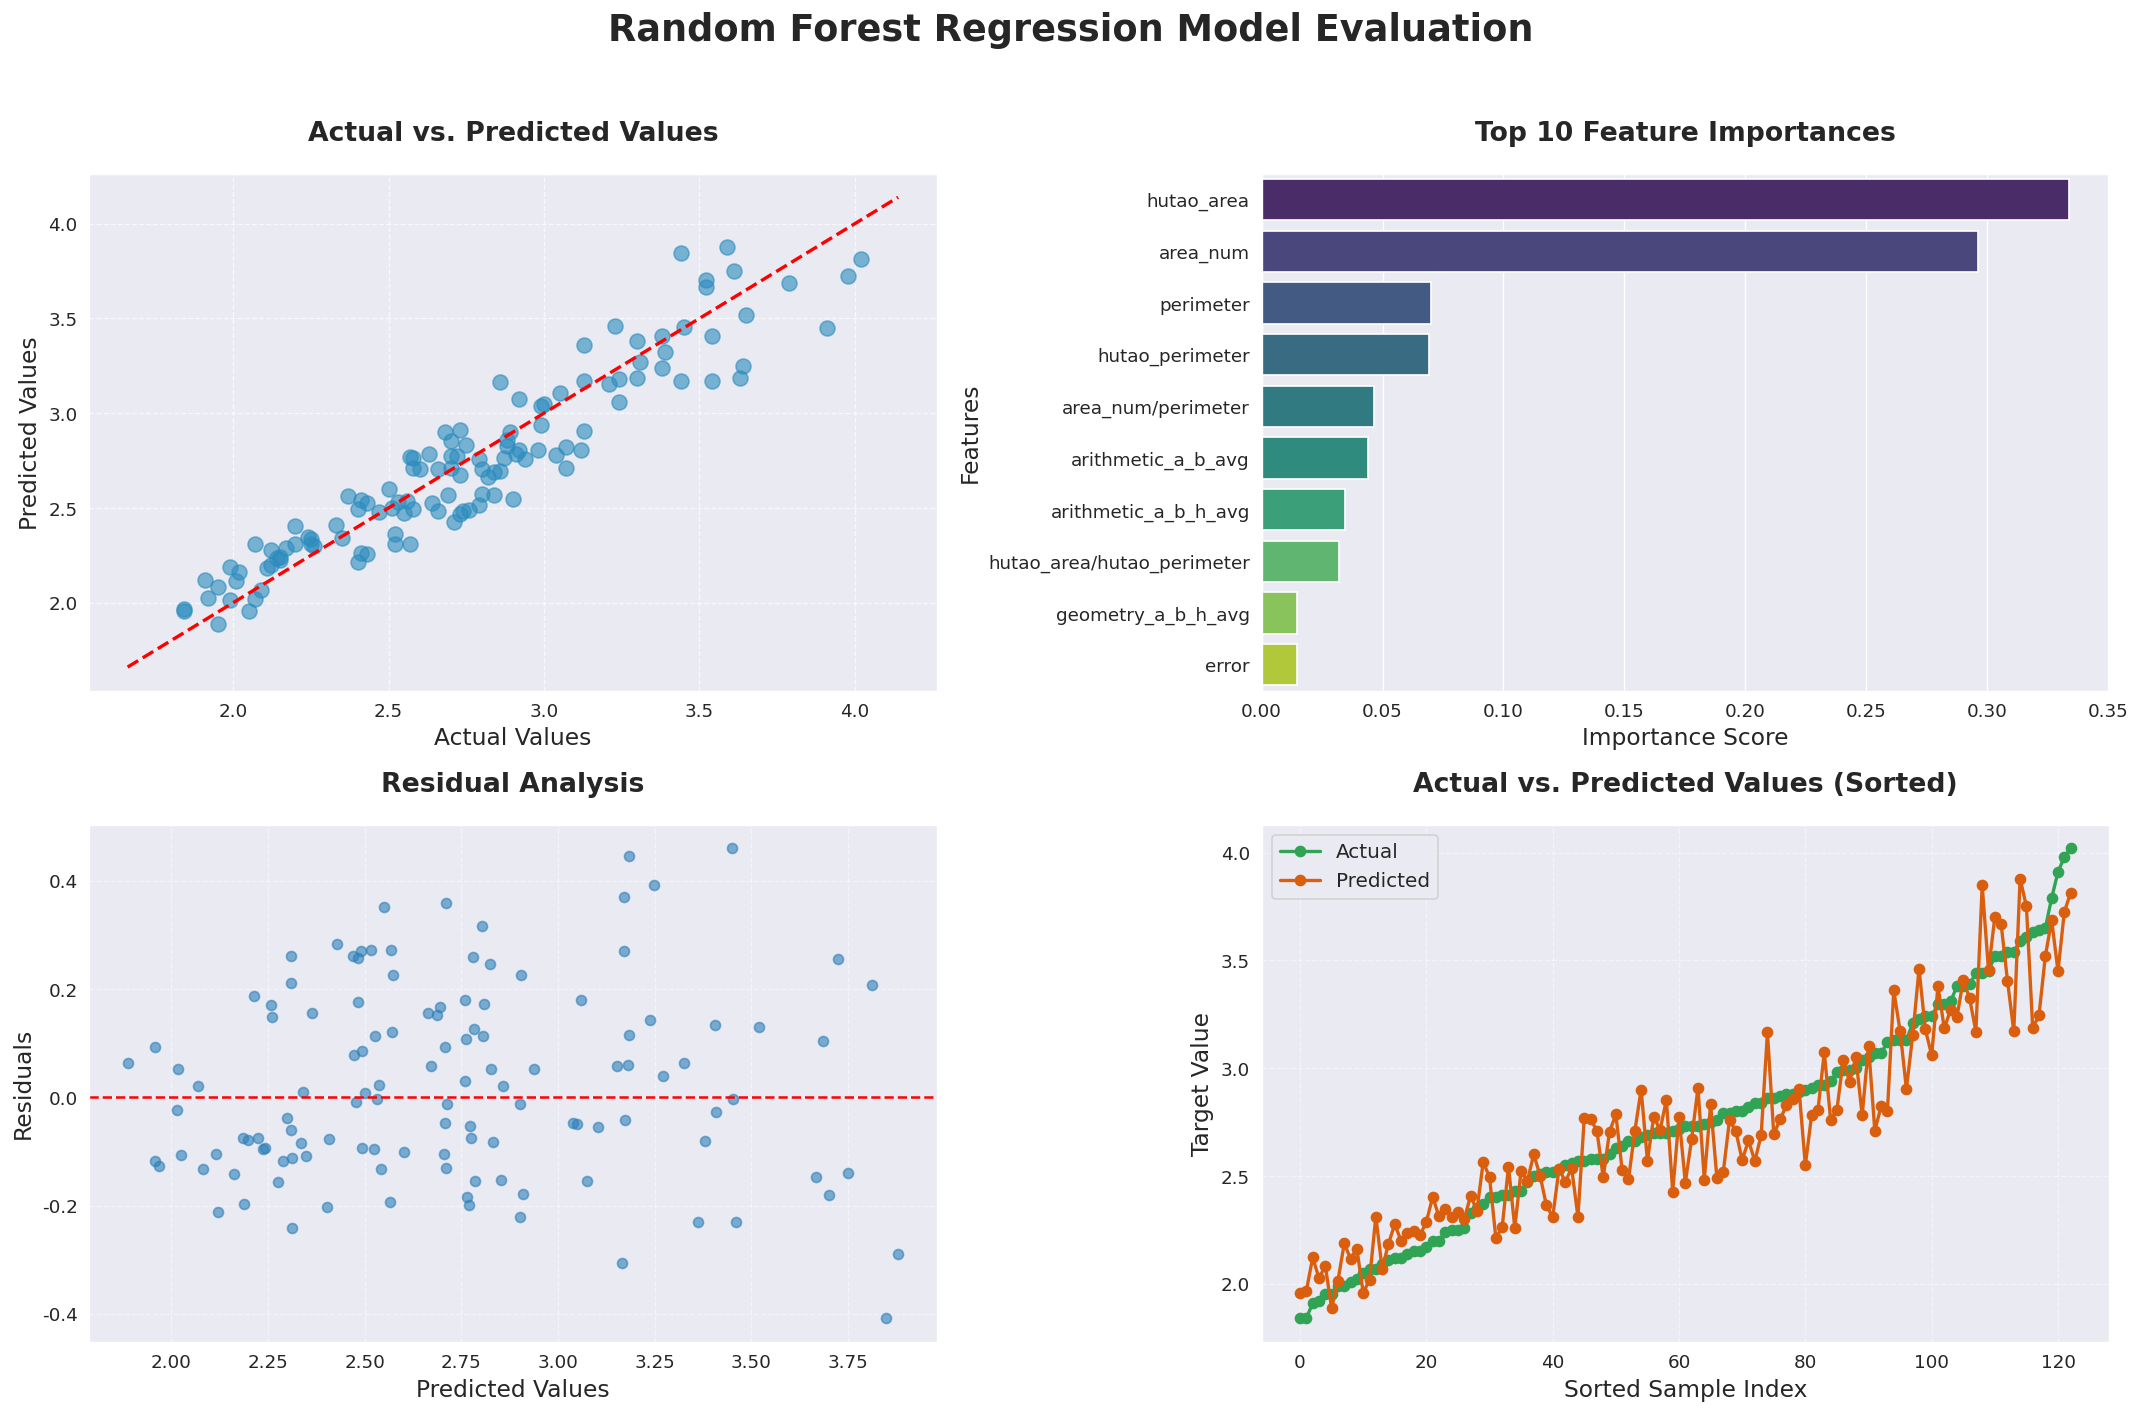

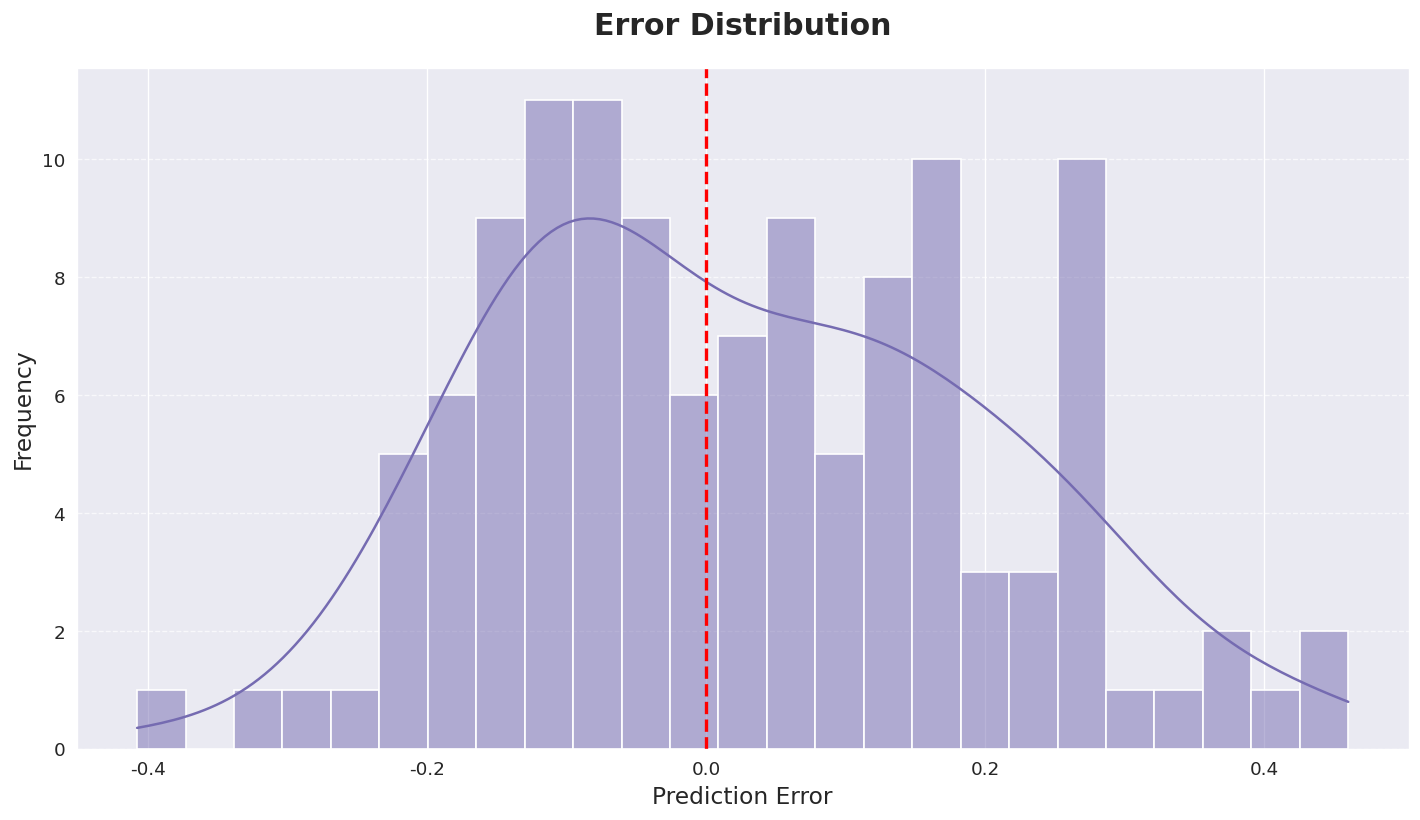

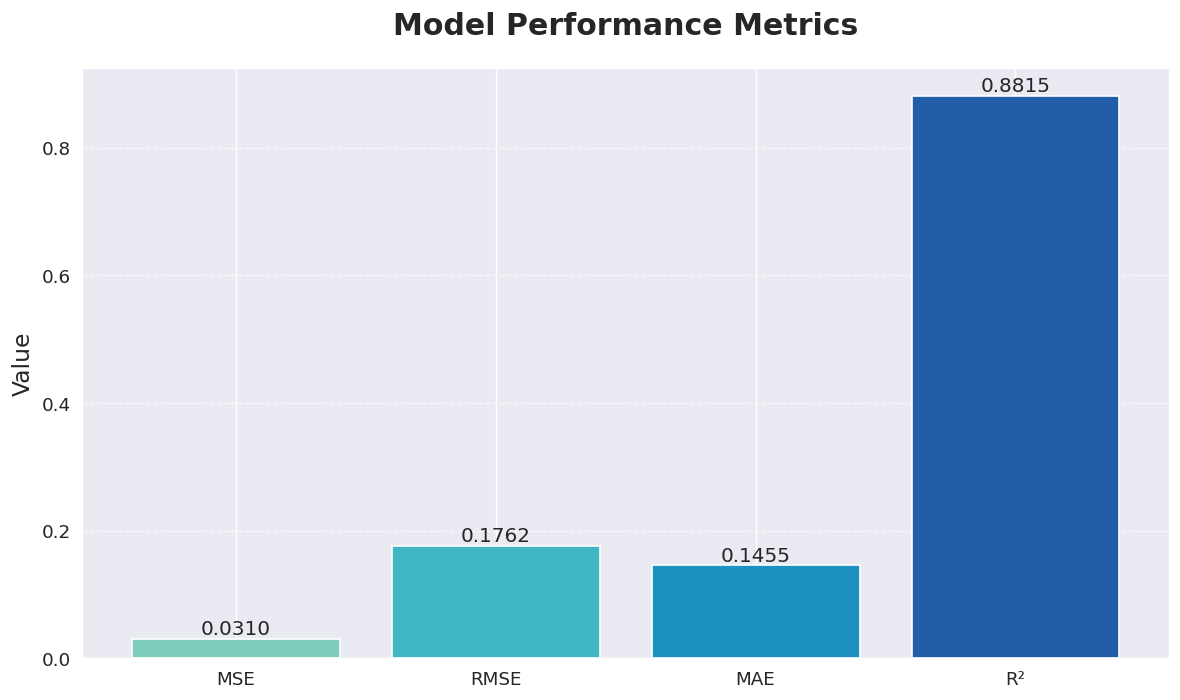

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib as mpl

# 设置全局样式
sns.set_style("darkgrid")
plt.rcParams['font.family'] = 'DejaVu Sans'
mpl.rcParams['axes.titlepad'] = 20
sns.set_palette('viridis')

# 读取Excel数据
df = pd.read_excel('核桃仁表型信息_重新标定.xlsx', sheet_name='Sheet1')

# 数据预处理
# 删除非特征列和目标列中的缺失值
df = df.drop(columns=['filename']).dropna(subset=['g'])

# 划分特征和目标变量
X = df.drop(columns=['g'])
y = df['g']

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 创建并训练随机森林模型
print("Training Random Forest model...")
rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)

# 预测与评估
y_pred = rf.predict(X_test)

# 计算评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation Results:")
print(f"MSE: {mse:.4f}")
print(f"RMSE: {rmse:.4f}")
print(f"MAE: {mae:.4f}")
print(f"R²: {r2:.4f}")

# 创建可视化图表
plt.figure(figsize=(18, 12))
plt.suptitle('Random Forest Regression Model Evaluation', fontsize=22, fontweight='bold')

# 1. 实际值 vs 预测值散点图
plt.subplot(2, 2, 1)
plt.scatter(y_test, y_pred, alpha=0.6, s=80, color='#2b8cbe')
plt.plot([min(y), max(y)], [min(y), max(y)], 'r--', lw=2)
plt.title('Actual vs. Predicted Values', fontsize=16, fontweight='bold')
plt.xlabel('Actual Values', fontsize=14)
plt.ylabel('Predicted Values', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.7)

# 2. 特征重要性
feature_imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
plt.subplot(2, 2, 2)
sns.barplot(x=feature_imp.head(10).values, y=feature_imp.head(10).index, palette='viridis')
plt.title('Top 10 Feature Importances', fontsize=16, fontweight='bold')
plt.xlabel('Importance Score', fontsize=14)
plt.ylabel('Features', fontsize=14)
plt.tight_layout()

# 3. 残差图
plt.subplot(2, 2, 3)
residuals = y_test - y_pred
plt.scatter(y_pred, residuals, alpha=0.6, color='#2c7fb8')
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residual Analysis', fontsize=16, fontweight='bold')
plt.xlabel('Predicted Values', fontsize=14)
plt.ylabel('Residuals', fontsize=14)
plt.grid(True, linestyle='--', alpha=0.5)

# 4. 实际值和预测值对比（排序后）
plt.subplot(2, 2, 4)
sorted_idx = y_test.argsort()
plt.plot(np.arange(len(y_test)), y_test.iloc[sorted_idx], 'o-', label='Actual',
         markersize=6, color='#31a354', linewidth=2)
plt.plot(np.arange(len(y_pred)), y_pred[sorted_idx], 'o-', label='Predicted',
         markersize=6, color='#d95f0e', linewidth=2)
plt.title('Actual vs. Predicted Values (Sorted)', fontsize=16, fontweight='bold')
plt.xlabel('Sorted Sample Index', fontsize=14)
plt.ylabel('Target Value', fontsize=14)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.savefig('rf_model_evaluation.png', dpi=300, bbox_inches='tight')
plt.show()

# 创建误差分布图
plt.figure(figsize=(12, 7))
sns.histplot(residuals, kde=True, bins=25, color='#756bb1')
plt.title('Error Distribution', fontsize=18, fontweight='bold')
plt.xlabel('Prediction Error', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.axvline(x=0, color='r', linestyle='--', linewidth=2)
plt.tight_layout()
plt.savefig('error_distribution.png', dpi=300, bbox_inches='tight')

# 创建评估指标汇总图
plt.figure(figsize=(10, 6))
metrics = ['MSE', 'RMSE', 'MAE', 'R²']
values = [mse, rmse, mae, r2]

bars = plt.bar(metrics, values, color=['#7fcdbb', '#41b6c4', '#1d91c0', '#225ea8'])
plt.title('Model Performance Metrics', fontsize=18, fontweight='bold')
plt.ylabel('Value', fontsize=14)

# 在柱子上方添加数值标签
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.001,
             f'{yval:.4f}', ha='center', va='bottom', fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.savefig('model_metrics.png', dpi=300, bbox_inches='tight')
plt.show()

# LSTM

Using device: cpu
Epoch [10/100], Train Loss: 0.147718, Val Loss: 0.107885
Epoch [20/100], Train Loss: 0.074688, Val Loss: 0.043616
Epoch [30/100], Train Loss: 0.064863, Val Loss: 0.038901
Epoch [40/100], Train Loss: 0.066043, Val Loss: 0.043469
Epoch [50/100], Train Loss: 0.063640, Val Loss: 0.036773
Epoch [60/100], Train Loss: 0.056823, Val Loss: 0.038348
Epoch [70/100], Train Loss: 0.058790, Val Loss: 0.037121
Early stopping at epoch 71
Training completed in 0.16 minutes

Model Evaluation on Test Set:
Test MSE: 0.0283
Test RMSE: 0.1683
Test MAE: 0.1373
Test R²: 0.8918


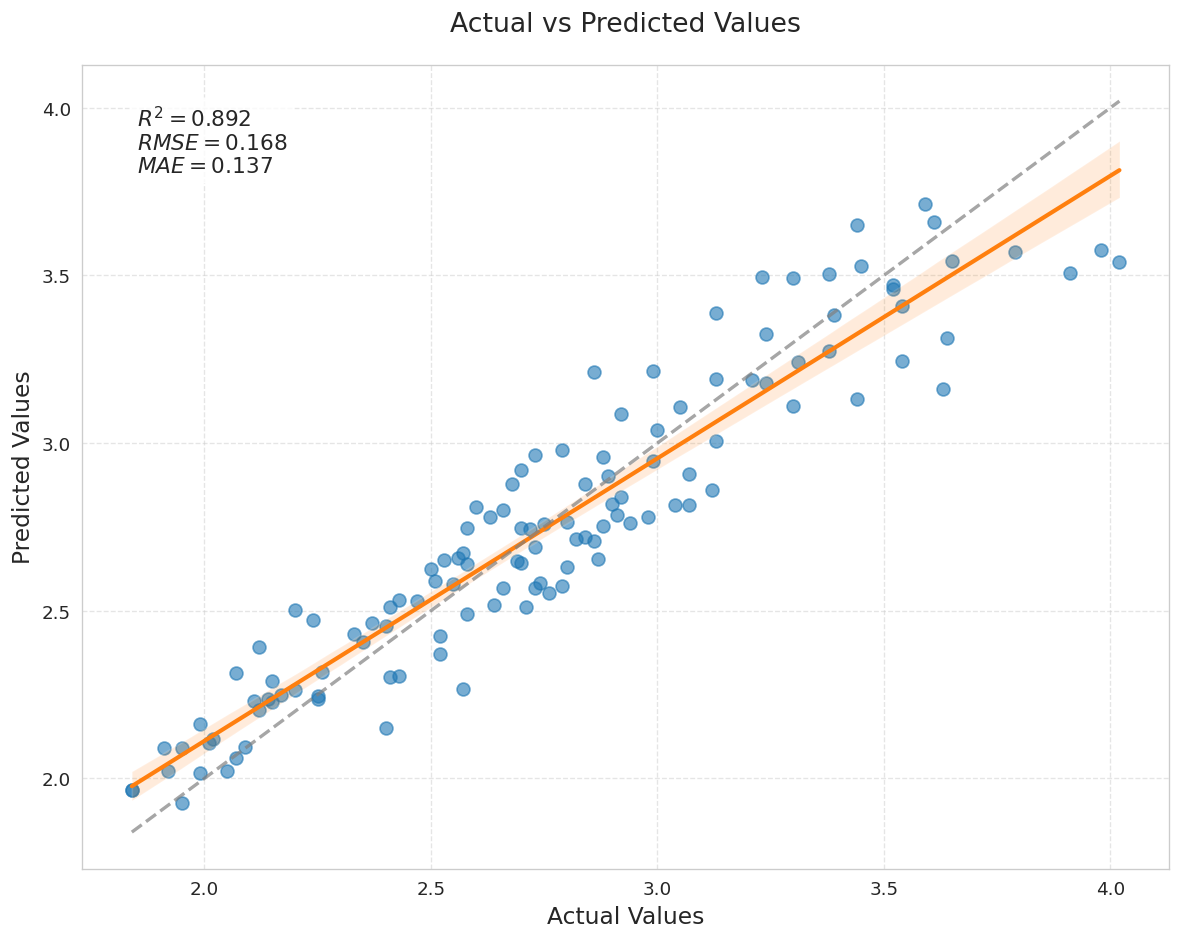

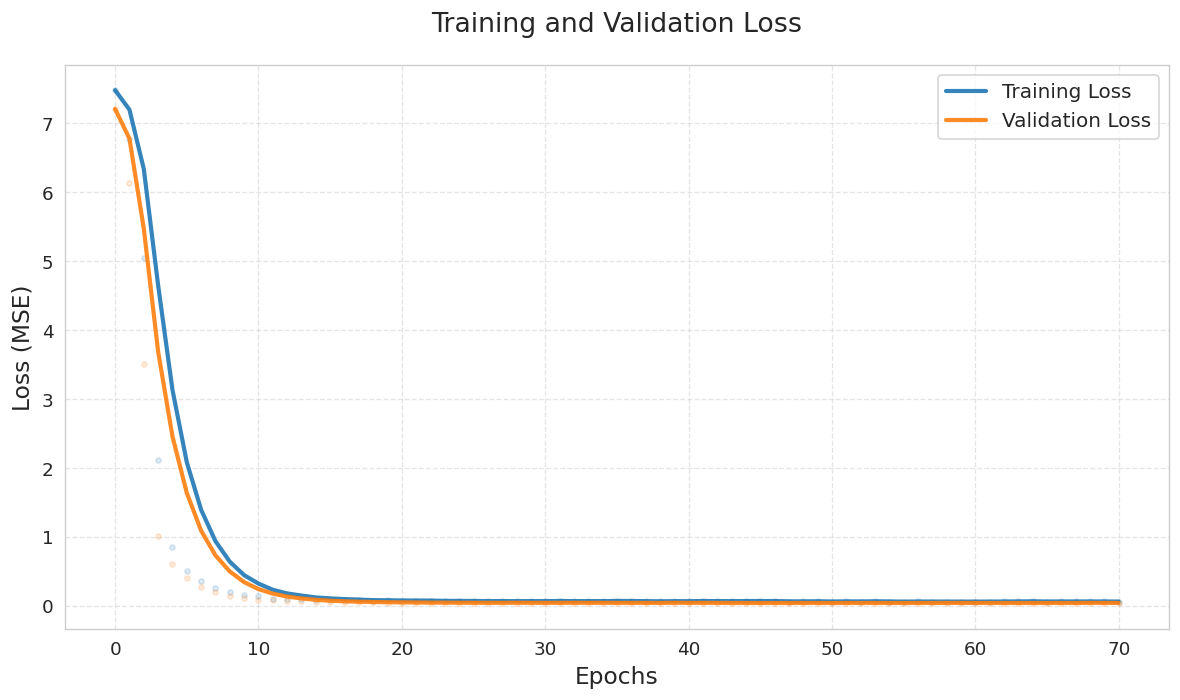

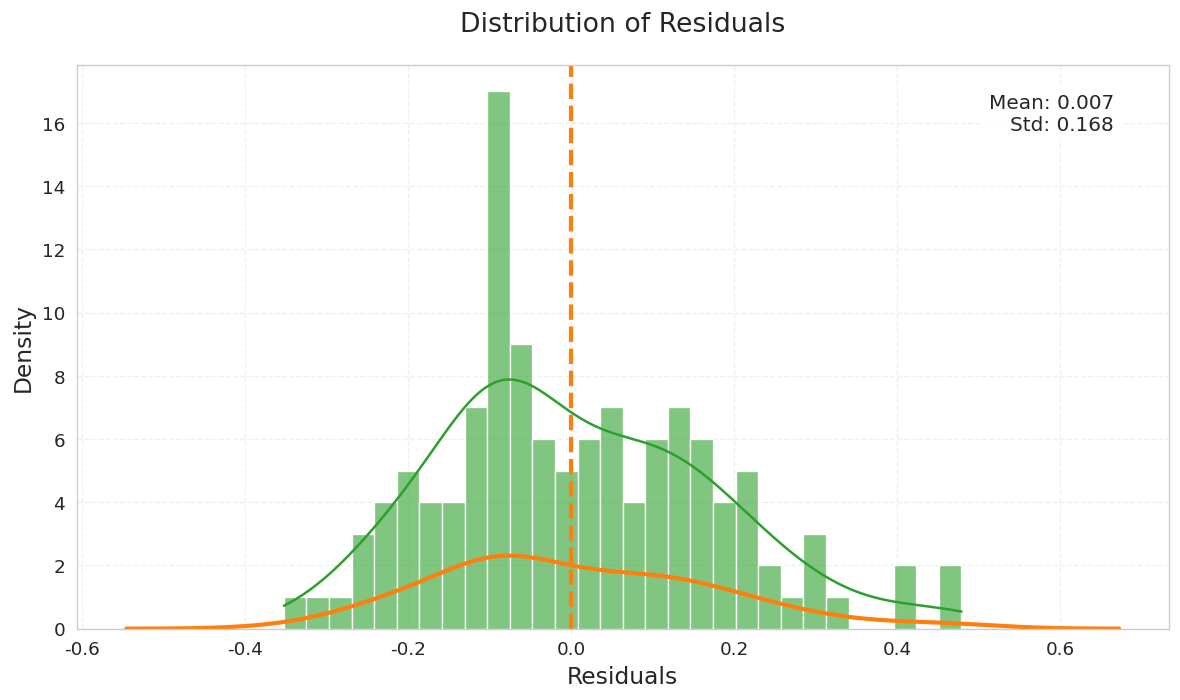

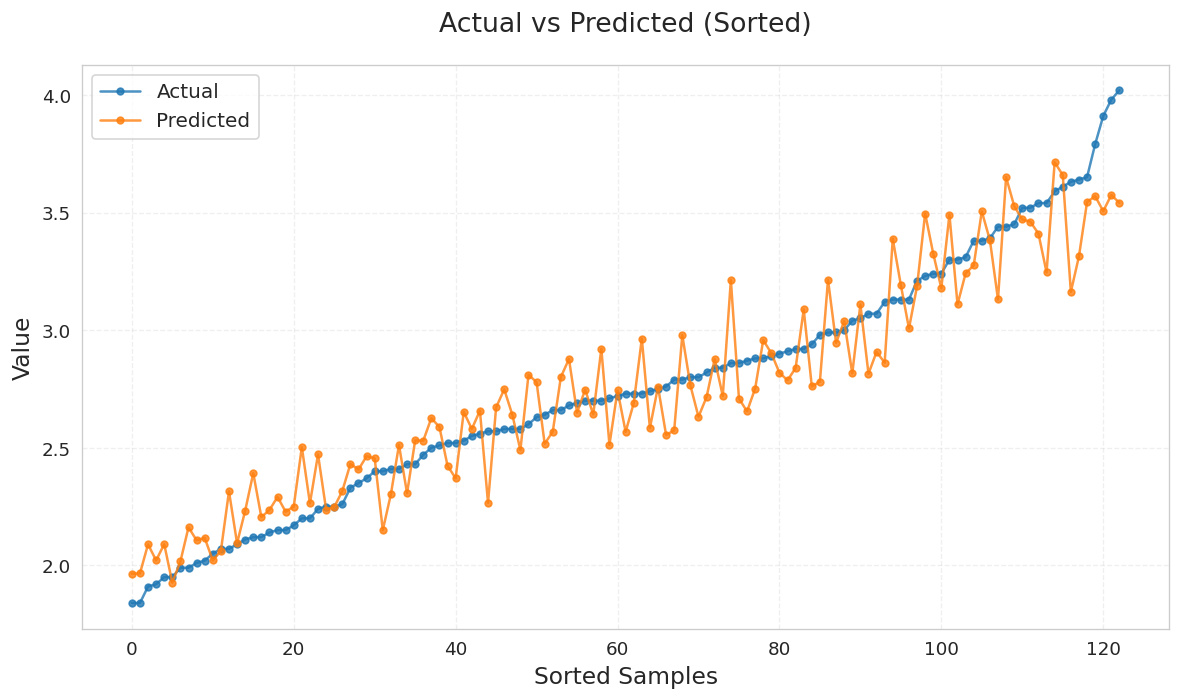

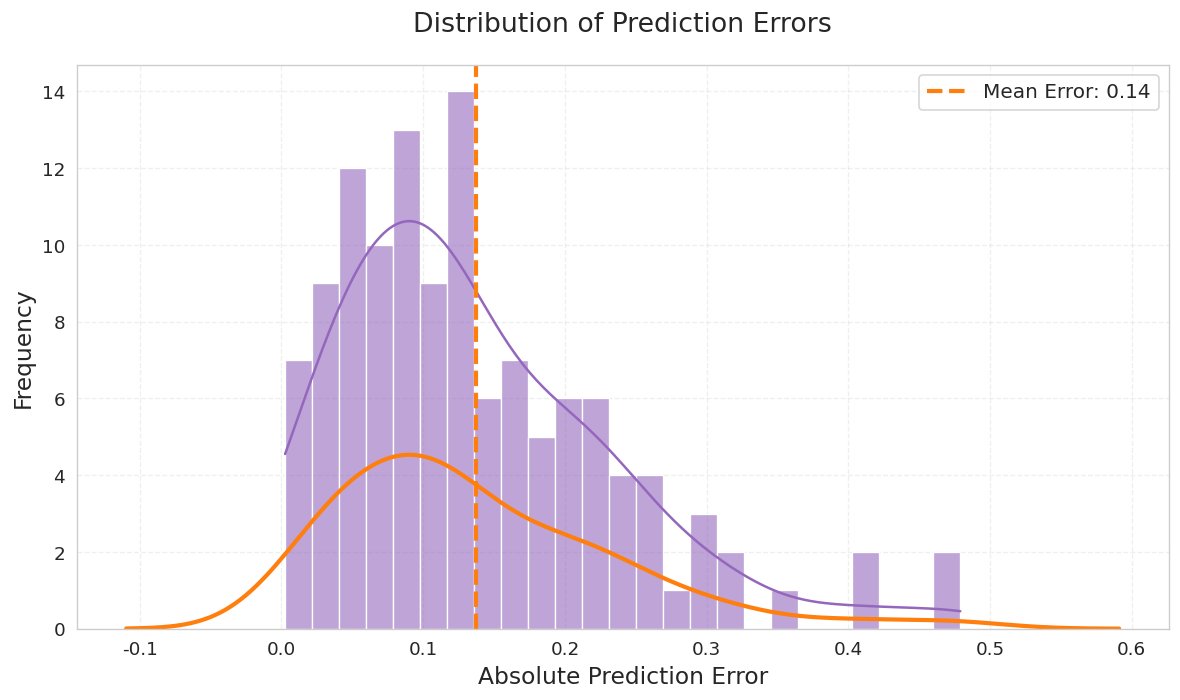

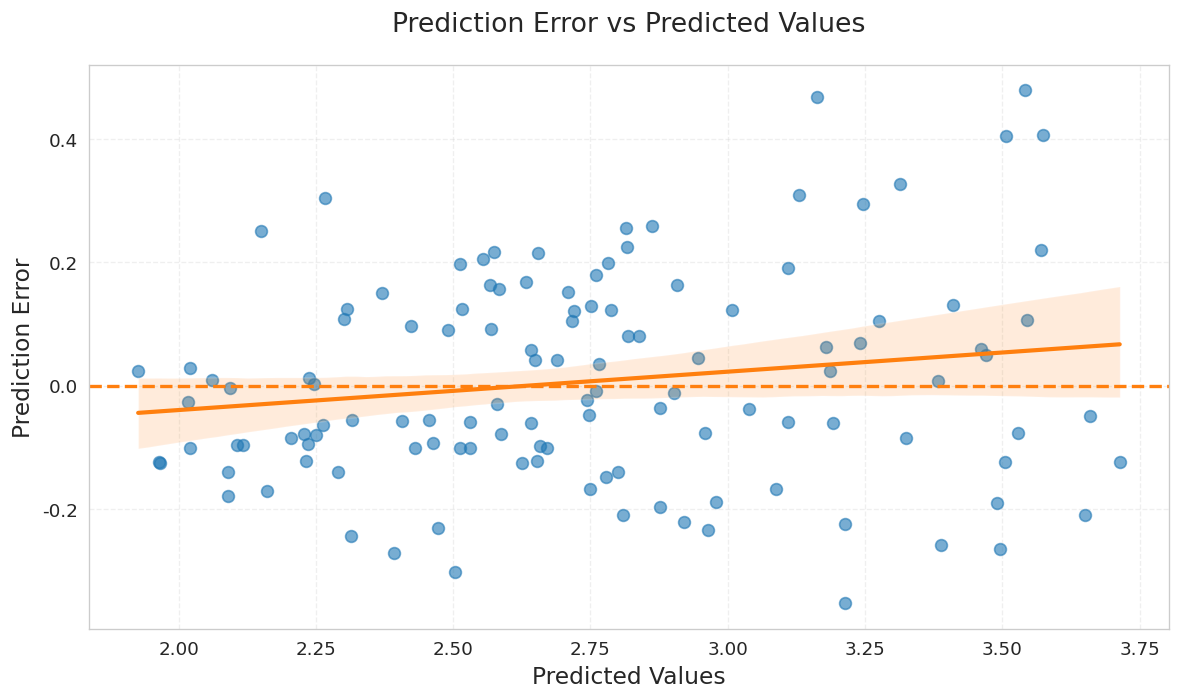


All evaluation plots have been saved as high-resolution PNG files.


In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset, random_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import time

# 设置专业图表风格
sns.set_style("whitegrid", {'grid.linestyle': '--', 'grid.alpha': 0.7})
plt.rcParams['figure.figsize'] = (10, 7)
plt.rcParams['figure.dpi'] = 120
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['axes.titlesize'] = 16
plt.rcParams['legend.fontsize'] = 12
plt.rcParams['xtick.labelsize'] = 11
plt.rcParams['ytick.labelsize'] = 11
plt.rcParams['font.family'] = 'DejaVu Sans'

# 设置随机种子以确保可重复性
torch.manual_seed(42)
np.random.seed(42)

# 检查GPU是否可用
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# 加载Excel数据
df = pd.read_excel('核桃仁表型信息_重新标定.xlsx', sheet_name='Sheet1')

# 准备数据
X = df.drop(['g', 'filename'], axis=1).values  # 移除目标列和文件名列
y = df['g'].values.reshape(-1, 1)

# 数据预处理
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
joblib.dump(scaler, 'scaler.pkl')  # 保存标准化器

# 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

# 转换为PyTorch张量并重塑为LSTM需要的形状 (samples, timesteps, features)
X_train_tensor = torch.tensor(X_train, dtype=torch.float32).unsqueeze(1)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32)

# 创建数据集和数据加载器
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

# 从训练集中划分验证集
train_size = int(0.8 * len(train_dataset))
val_size = len(train_dataset) - train_size
train_dataset, val_dataset = random_split(train_dataset, [train_size, val_size])

batch_size = 32
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size)
test_loader = DataLoader(test_dataset, batch_size=batch_size)

# 定义LSTM模型
class LSTMRegressor(nn.Module):
    def __init__(self, input_size, hidden_size1=128, hidden_size2=64, output_size=1, dropout_prob=0.3):
        super(LSTMRegressor, self).__init__()
        self.lstm1 = nn.LSTM(input_size, hidden_size1, batch_first=True)
        self.dropout1 = nn.Dropout(dropout_prob)
        self.lstm2 = nn.LSTM(hidden_size1, hidden_size2, batch_first=True)
        self.dropout2 = nn.Dropout(dropout_prob/2)
        self.fc1 = nn.Linear(hidden_size2, 32)
        self.fc2 = nn.Linear(32, output_size)
        self.relu = nn.ReLU()

    def forward(self, x):
        out, _ = self.lstm1(x)
        out = self.dropout1(out)
        out, _ = self.lstm2(out)
        out = self.dropout2(out[:, -1, :])  # 只取最后一个时间步的输出
        out = self.relu(self.fc1(out))
        out = self.fc2(out)
        return out

# 初始化模型
input_size = X_train.shape[1]
model = LSTMRegressor(input_size).to(device)

# 定义损失函数和优化器
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 训练模型
num_epochs = 100
train_losses = []
val_losses = []
best_val_loss = float('inf')
patience = 20
counter = 0

start_time = time.time()

for epoch in range(num_epochs):
    # 训练阶段
    model.train()
    train_epoch_loss = 0
    for inputs, targets in train_loader:
        inputs, targets = inputs.to(device), targets.to(device)

        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_epoch_loss += loss.item() * inputs.size(0)

    train_epoch_loss /= len(train_loader.dataset)
    train_losses.append(train_epoch_loss)

    # 验证阶段
    model.eval()
    val_epoch_loss = 0
    with torch.no_grad():
        for inputs, targets in val_loader:
            inputs, targets = inputs.to(device), targets.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, targets)
            val_epoch_loss += loss.item() * inputs.size(0)

    val_epoch_loss /= len(val_loader.dataset)
    val_losses.append(val_epoch_loss)

    # 早停机制
    if val_epoch_loss < best_val_loss:
        best_val_loss = val_epoch_loss
        counter = 0
        # 保存最佳模型
        torch.save(model.state_dict(), 'best_lstm_model.pth')
    else:
        counter += 1
        if counter >= patience:
            print(f"Early stopping at epoch {epoch+1}")
            break

    # 打印进度
    if (epoch+1) % 10 == 0:
        print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {train_epoch_loss:.6f}, Val Loss: {val_epoch_loss:.6f}")

end_time = time.time()
print(f"Training completed in {(end_time - start_time)/60:.2f} minutes")

# 加载最佳模型
model.load_state_dict(torch.load('best_lstm_model.pth'))
model.eval()

# 在测试集上进行预测
test_preds = []
test_targets = []
with torch.no_grad():
    for inputs, targets in test_loader:
        inputs = inputs.to(device)
        outputs = model(inputs)
        test_preds.extend(outputs.cpu().numpy())
        test_targets.extend(targets.numpy())

y_pred = np.array(test_preds).flatten()
y_test = np.array(test_targets).flatten()

# 评估指标
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("\nModel Evaluation on Test Set:")
print(f"Test MSE: {mse:.4f}")
print(f"Test RMSE: {rmse:.4f}")
print(f"Test MAE: {mae:.4f}")
print(f"Test R²: {r2:.4f}")

# 创建现代风格的评估图表
def create_modern_plots(y_test, y_pred, train_losses, val_losses):
    # 创建主题颜色
    primary_color = '#1f77b4'  # 深蓝色
    secondary_color = '#ff7f0e'  # 橙色
    tertiary_color = '#2ca02c'  # 绿色

    # 1. 预测值 vs 实际值散点图（带回归线）
    plt.figure(figsize=(10, 8))
    ax = sns.regplot(x=y_test, y=y_pred,
                     scatter_kws={'alpha': 0.6, 's': 60, 'color': primary_color},
                     line_kws={'color': secondary_color, 'linewidth': 2.5})

    # 添加完美预测线
    plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)],
             '--', color='gray', linewidth=2, alpha=0.7)

    plt.xlabel('Actual Values', fontsize=14)
    plt.ylabel('Predicted Values', fontsize=14)
    plt.title('Actual vs Predicted Values', fontsize=16)

    # 添加评估指标标注
    plt.text(0.05, 0.95, f'$R^2 = {r2:.3f}$\n$RMSE = {rmse:.3f}$\n$MAE = {mae:.3f}$',
             transform=plt.gca().transAxes, fontsize=13,
             verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.grid(True, linestyle='--', alpha=0.5)
    plt.tight_layout()
    plt.savefig('scatter_plot.png', bbox_inches='tight')
    plt.show()

    # 2. 训练过程损失曲线（带平滑）
    plt.figure(figsize=(10, 6))

    # 应用平滑处理
    def smooth(scalars, weight=0.6):
        last = scalars[0]
        smoothed = []
        for point in scalars:
            smoothed_val = last * weight + (1 - weight) * point
            smoothed.append(smoothed_val)
            last = smoothed_val
        return smoothed

    smooth_train = smooth(train_losses)
    smooth_val = smooth(val_losses)

    plt.plot(smooth_train, label='Training Loss', color=primary_color, linewidth=2.5, alpha=0.9)
    plt.plot(smooth_val, label='Validation Loss', color=secondary_color, linewidth=2.5, alpha=0.9)

    # 添加原始数据点（透明度较低）
    plt.scatter(range(len(train_losses)), train_losses, color=primary_color, alpha=0.15, s=10)
    plt.scatter(range(len(val_losses)), val_losses, color=secondary_color, alpha=0.15, s=10)

    plt.xlabel('Epochs', fontsize=14)
    plt.ylabel('Loss (MSE)', fontsize=14)
    plt.title('Training and Validation Loss', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.5)

    plt.tight_layout()
    plt.savefig('loss_curve.png', bbox_inches='tight')
    plt.show()

    # 3. 残差分布（现代直方图）
    plt.figure(figsize=(10, 6))
    residuals = y_test - y_pred

    # 使用Seaborn的histplot
    sns.histplot(residuals, kde=True, color=tertiary_color, bins=30,
                 alpha=0.6, linewidth=0.8)

    # 添加KDE曲线（单独设置线宽）
    sns.kdeplot(residuals, color=secondary_color, linewidth=2.5)

    plt.axvline(0, color=secondary_color, linestyle='--', linewidth=2.5)
    plt.xlabel('Residuals', fontsize=14)
    plt.ylabel('Density', fontsize=14)
    plt.title('Distribution of Residuals', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.3)

    # 添加统计信息
    mean_res = np.mean(residuals)
    std_res = np.std(residuals)
    plt.text(0.95, 0.95, f'Mean: {mean_res:.3f}\nStd: {std_res:.3f}',
             transform=plt.gca().transAxes, fontsize=12,
             verticalalignment='top', horizontalalignment='right',
             bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.savefig('residuals_distribution.png', bbox_inches='tight')
    plt.show()

    # 4. 实际值与预测值对比（按样本排序）
    plt.figure(figsize=(10, 6))
    sorted_idx = np.argsort(y_test)

    plt.plot(np.arange(len(y_test)), y_test[sorted_idx], 'o-',
             color=primary_color, label='Actual', linewidth=1.5, markersize=4, alpha=0.8)
    plt.plot(np.arange(len(y_pred)), y_pred[sorted_idx], 'o-',
             color=secondary_color, label='Predicted', linewidth=1.5, markersize=4, alpha=0.8)

    plt.xlabel('Sorted Samples', fontsize=14)
    plt.ylabel('Value', fontsize=14)
    plt.title('Actual vs Predicted (Sorted)', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.savefig('sorted_comparison.png', bbox_inches='tight')
    plt.show()

    # 5. 预测误差直方图（现代风格）
    plt.figure(figsize=(10, 6))
    errors = np.abs(y_test - y_pred)

    # 使用Seaborn的histplot
    sns.histplot(errors, kde=True, color='#9467bd', bins=25,
                 alpha=0.6, linewidth=0.8)

    # 添加KDE曲线（单独设置线宽）
    sns.kdeplot(errors, color=secondary_color, linewidth=2.5)

    mean_error = np.mean(errors)
    plt.axvline(mean_error, color=secondary_color, linestyle='--',
                linewidth=2.5, label=f'Mean Error: {mean_error:.2f}')

    plt.xlabel('Absolute Prediction Error', fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.title('Distribution of Prediction Errors', fontsize=16)
    plt.legend(fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.savefig('error_distribution.png', bbox_inches='tight')
    plt.show()

    # 6. 误差与预测值的关系（带回归线）
    plt.figure(figsize=(10, 6))
    ax = sns.regplot(x=y_pred, y=y_test - y_pred,
                     scatter_kws={'alpha': 0.6, 's': 50, 'color': primary_color},
                     line_kws={'color': secondary_color, 'linewidth': 2.5})

    plt.axhline(0, color=secondary_color, linestyle='--', linewidth=2)
    plt.xlabel('Predicted Values', fontsize=14)
    plt.ylabel('Prediction Error', fontsize=14)
    plt.title('Prediction Error vs Predicted Values', fontsize=16)
    plt.grid(True, linestyle='--', alpha=0.3)

    plt.tight_layout()
    plt.savefig('error_vs_predicted.png', bbox_inches='tight')
    plt.show()

# 生成所有现代风格的图表
create_modern_plots(y_test, y_pred, train_losses, val_losses)

# 创建评估指标汇总表
metrics_df = pd.DataFrame({
    'Metric': ['MSE', 'RMSE', 'MAE', 'R²'],
    'Value': [mse, rmse, mae, r2]
})

# 保存评估指标到CSV
metrics_df.to_csv('model_metrics.csv', index=False)

print("\nAll evaluation plots have been saved as high-resolution PNG files.")

# SVM

Epoch [10/100], Train Loss: 0.1335, Val Loss: 0.1319
Epoch [20/100], Train Loss: 0.1297, Val Loss: 0.1310
Epoch [30/100], Train Loss: 0.1269, Val Loss: 0.1304
Epoch [40/100], Train Loss: 0.1335, Val Loss: 0.1302
Epoch [50/100], Train Loss: 0.1283, Val Loss: 0.1299
Epoch [60/100], Train Loss: 0.1332, Val Loss: 0.1297
Epoch [70/100], Train Loss: 0.1289, Val Loss: 0.1301
Epoch [80/100], Train Loss: 0.1282, Val Loss: 0.1293
Epoch [90/100], Train Loss: 0.1287, Val Loss: 0.1291
Epoch [100/100], Train Loss: 0.1316, Val Loss: 0.1297

集成模型均方误差(MSE): 0.0282

集成误差(RMSE): 0.0282
集成模型决定系数(R²): 0.8883


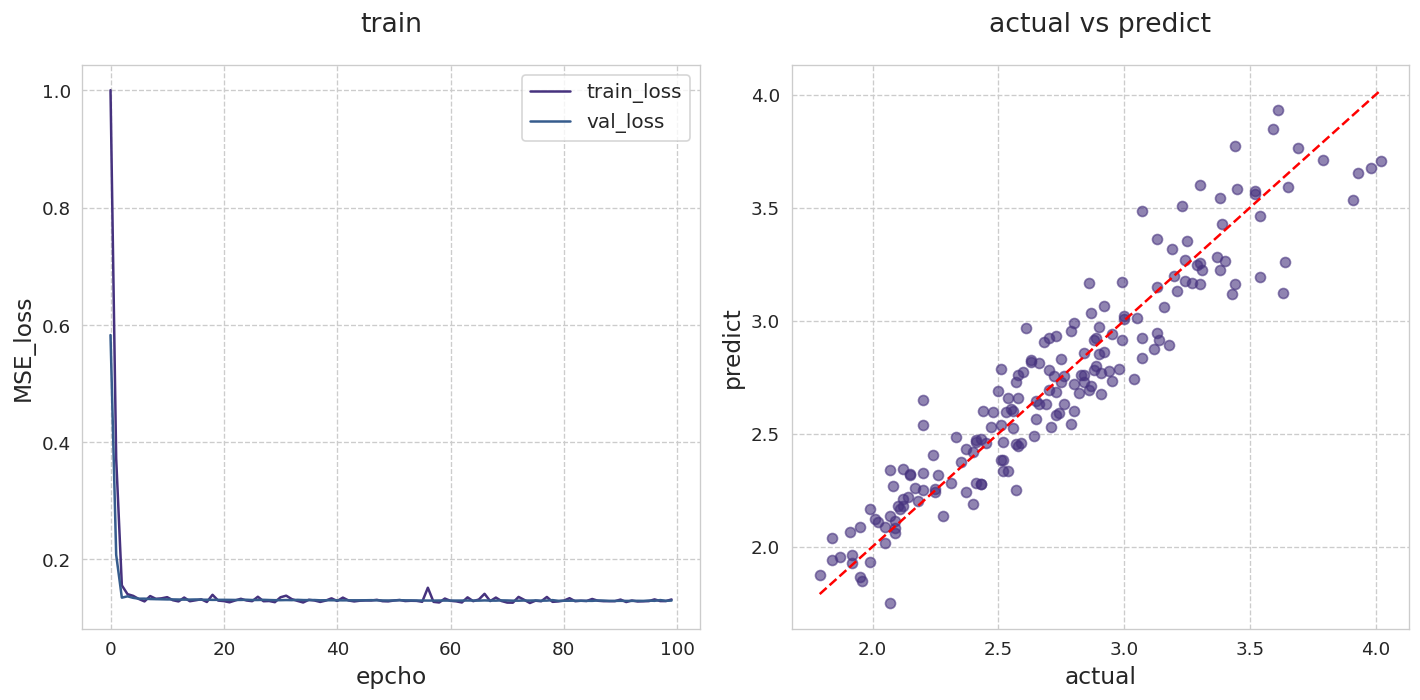

In [42]:
import pandas as pd
from matplotlib import rcParams
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
from torch.utils.data import TensorDataset, DataLoader

rcParams["font.sans-serif"] = ["SimHei"]  # 指定中文字体
rcParams["axes.unicode_minus"] = False  # 解决负号显示问题
df = pd.read_excel('核桃仁表型信息_重新标定.xlsx')
df = df.drop('filename', axis=1)
X, Y = df.drop('g', axis=1), df['g']
X = X.drop('error', axis=1)
X.shape
# 1. 生成示例数据集
X, y = X, Y

# 2. 数据预处理
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# 3. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42
)

# 4. 训练SVR模型
svr_model = SVR(
    kernel='rbf',
    C=1.0,
    epsilon=0.1,
    gamma='scale'
)
svr_model.fit(X_train, y_train)

# 5. 使用SVR进行预测（输出作为神经网络输入）
train_svr_pred = svr_model.predict(X_train)
test_svr_pred = svr_model.predict(X_test)

# 将SVR输出转换为PyTorch张量
X_train_nn = torch.tensor(train_svr_pred.reshape(-1, 1), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32)
X_test_nn = torch.tensor(test_svr_pred.reshape(-1, 1), dtype=torch.float32)

# 创建数据加载器
train_dataset = TensorDataset(X_train_nn, y_train_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)


# 6. 构建PyTorch神经网络模型
class RegressionNN(nn.Module):
    def __init__(self):
        super(RegressionNN, self).__init__()
        self.layers = nn.Sequential(
            nn.Linear(1, 128),
            nn.ReLU(),
            nn.Linear(128, 1)
        )

    def forward(self, x):
        return self.layers(x)


model = RegressionNN()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# 7. 训练神经网络
train_losses = []
val_losses = []

for epoch in range(100):
    # 训练模式
    model.train()
    epoch_loss = 0.0

    for inputs, targets in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, targets.unsqueeze(1))
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

    # 计算平均训练损失
    avg_train_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_train_loss)

    # 验证模式
    model.eval()
    with torch.no_grad():
        val_preds = model(X_train_nn)
        val_loss = criterion(val_preds, y_train_tensor.unsqueeze(1))
        val_losses.append(val_loss.item())

    if (epoch + 1) % 10 == 0:
        print(f'Epoch [{epoch + 1}/100], Train Loss: {avg_train_loss:.4f}, Val Loss: {val_loss.item():.4f}')

# 8. 使用集成模型进行预测
model.eval()
with torch.no_grad():
    y_pred_scaled = model(X_test_nn).squeeze().numpy()

# 9. 反标准化得到最终预测结果
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 10. 评估模型性能
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)  # 直接输出RMSE
r2 = r2_score(y_true, y_pred)
print(f"\n集成模型均方误差(MSE): {mse:.4f}")
print(f"\n集成误差(RMSE): {rmse:.4f}")
print(f"集成模型决定系数(R²): {r2:.4f}")

# 11. 可视化结果
plt.figure(figsize=(12, 6))

# 绘制训练过程损失曲线
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='train_loss')
plt.plot(val_losses, label='val_loss')
plt.title('train')
plt.ylabel('MSE_loss')
plt.xlabel('epcho')
plt.legend()

# 绘制实际值 vs 预测值
plt.subplot(1, 2, 2)
plt.scatter(y_true, y_pred, alpha=0.6)
plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)], 'r--')
plt.title('actual vs predict')
plt.xlabel('actual')
plt.ylabel('predict')

plt.tight_layout()
plt.show()
from matplotlib import rcParams
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score


               SVR模型性能评估                
均方误差(MSE): 	0.0283
均方根误差(RMSE): 	0.0283
决定系数(R²): 	0.8878


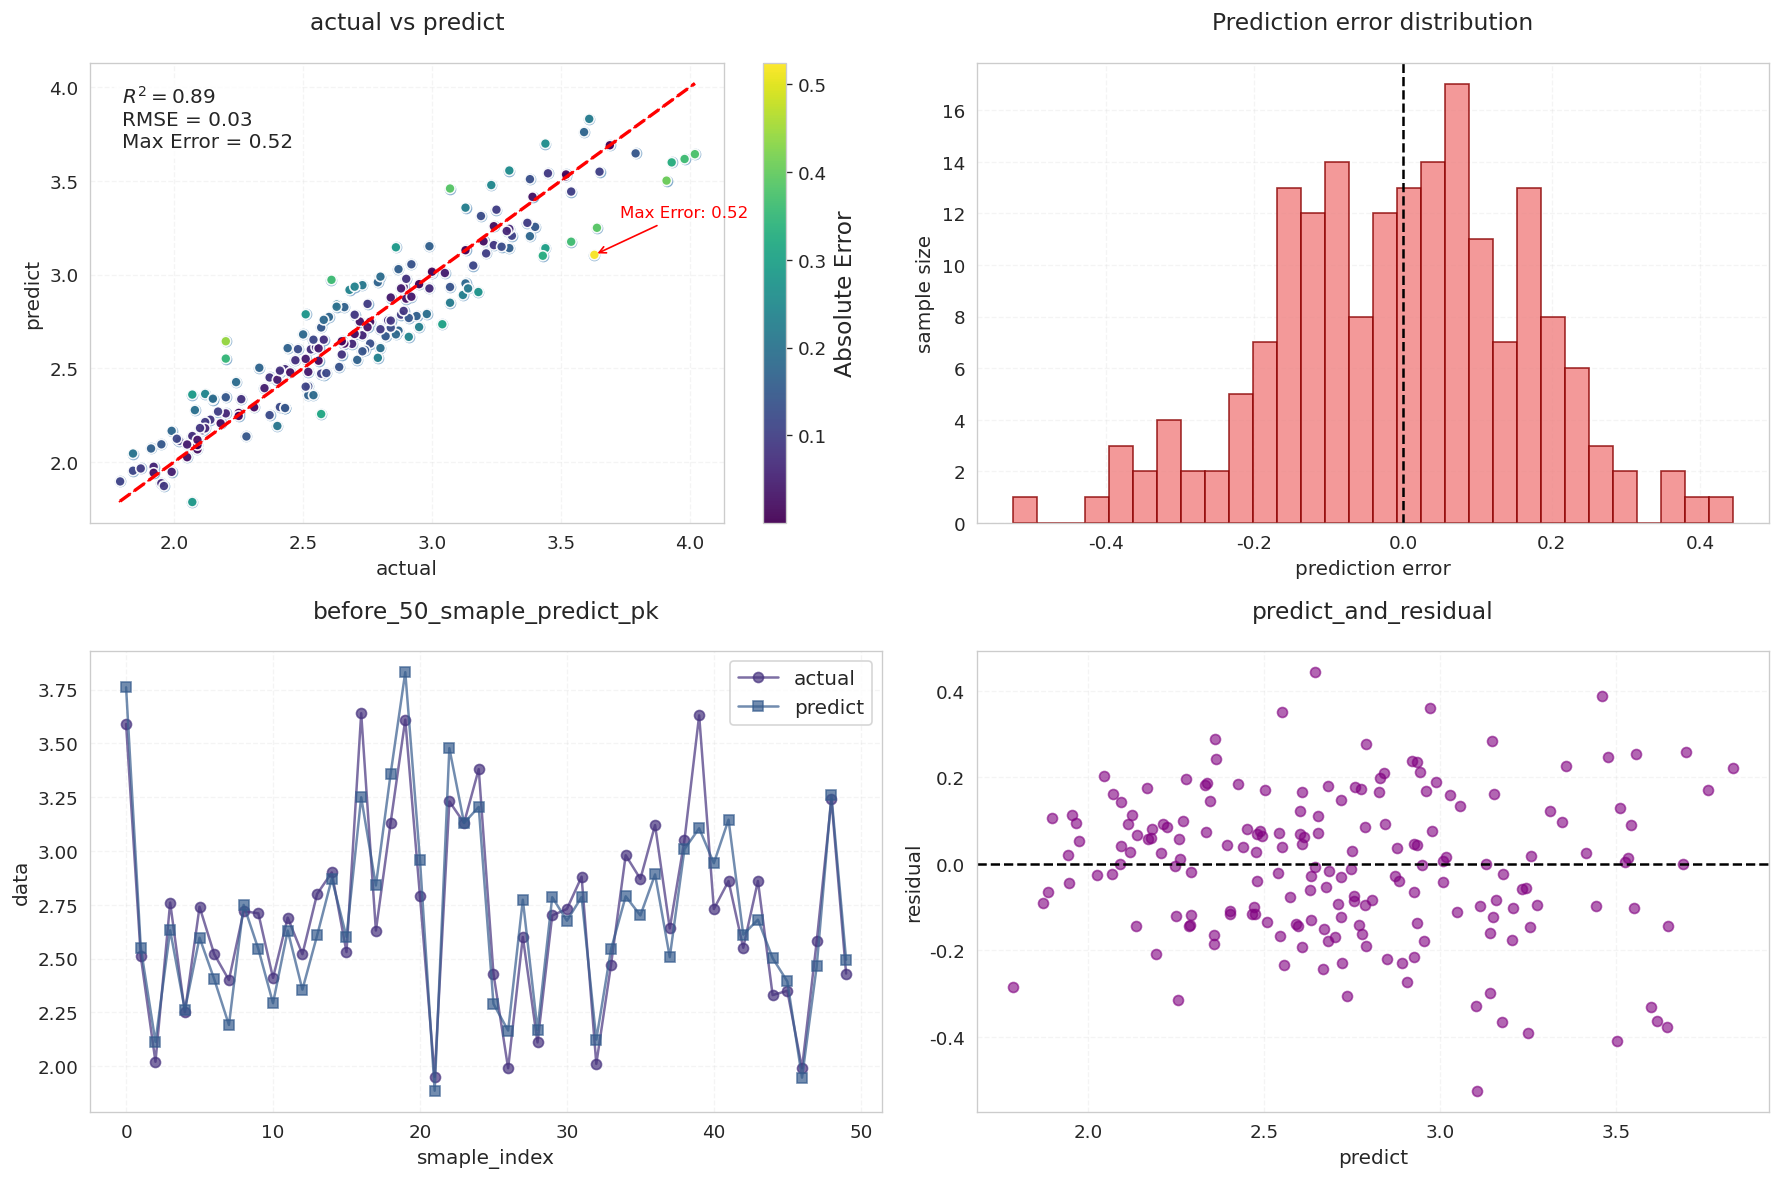

In [43]:

# 设置中文字体

df = pd.read_excel('核桃仁表型信息_重新标定.xlsx')
df = df.drop('filename', axis=1)
X, Y = df.drop('g', axis=1), df['g']
X = X.drop('error', axis=1)
X.shape
# 1. 生成示例数据集
X, y = X, Y
# 1. 数据预处理
scaler_X = StandardScaler()
scaler_y = StandardScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1)).flatten()

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y_scaled, test_size=0.3, random_state=42
)

# 3. 训练SVR模型[1,2](@ref)
svr_model = SVR(
    kernel='rbf',  # 使用径向基函数核处理非线性关系[4](@ref)
    C=1.0,  # 正则化参数，平衡模型复杂度与误差
    epsilon=0.1,  # 不敏感区域宽度，控制对噪声的容忍度[4](@ref)
    gamma='scale'  # 自动确定核函数影响范围
)
svr_model.fit(X_train, y_train)

# 4. 模型预测[1](@ref)
# 在标准化空间进行预测
y_pred_scaled = svr_model.predict(X_test)

# 5. 反标准化得到最终结果[1](@ref)
y_pred = scaler_y.inverse_transform(y_pred_scaled.reshape(-1, 1)).flatten()
y_true = scaler_y.inverse_transform(y_test.reshape(-1, 1)).flatten()

# 6. 模型评估[2,5](@ref)
mse = mean_squared_error(y_true, y_pred)
rmse = mean_squared_error(y_true, y_pred)  # 直接计算RMSE
r2 = r2_score(y_true, y_pred)

print("=" * 50)
print(f"{'SVR模型性能评估':^40}")
print("=" * 50)
print(f"均方误差(MSE): \t{mse:.4f}")
print(f"均方根误差(RMSE): \t{rmse:.4f}")
print(f"决定系数(R²): \t{r2:.4f}")
print("=" * 50)

# 7. 可视化结果[1,8](@ref)
plt.figure(figsize=(15, 10))

# 7.1 预测值 vs 实际值散点图
plt.subplot(2, 2, 1)
plt.scatter(y_true, y_pred, alpha=0.6, color='steelblue')
sc = plt.scatter(y_true, y_pred, c=np.abs(y_true - y_pred), cmap='viridis', alpha=0.95, edgecolors='w')
plt.colorbar(sc, label='Absolute Error')
# 绘制对角线
min_val = min(y_true.min(), y_pred.min())
max_val = max(y_true.max(), y_pred.max())
plt.plot([min_val, max_val], [min_val, max_val], 'r--', lw=1)
abs_errors = np.abs(y_true - y_pred)
max_error = np.max(abs_errors)
max_idx = np.argmax(abs_errors)  # 获取最大误差点的索引

# 标注最大误差点
plt.annotate(f'Max Error: {max_error:.2f}',
             xy=(y_true[max_idx], y_pred[max_idx]),
             xytext=(y_true[max_idx] + 0.1, y_pred[max_idx] + 0.2),
             arrowprops=dict(arrowstyle='->', color='red'),
             fontsize=10,
             color='red')
# 添加指标文本
textstr = '\n'.join((
    fr'$R^2 = {r2:.2f}$',
    fr'RMSE = {rmse:.2f}',
    fr'Max Error = {max_error:.2f}'))
plt.gca().text(0.05, 0.95, textstr, transform=plt.gca().transAxes,
               fontsize=12, verticalalignment='top', bbox=dict(facecolor='white', alpha=0.8))

plt.plot([min(y_true), max(y_true)], [min(y_true), max(y_true)],
         'r--', linewidth=2)
plt.title('actual vs predict', fontsize=14)
plt.xlabel('actual', fontsize=12)
plt.ylabel('predict', fontsize=12)
plt.grid(alpha=0.2)

# 7.2 预测误差分布直方图
plt.subplot(2, 2, 2)
errors = y_pred - y_true
plt.hist(errors, bins=30, color='lightcoral', edgecolor='darkred', alpha=0.8)
plt.axvline(x=0, color='k', linestyle='--')
# 预测误差分布
plt.title('Prediction error distribution', fontsize=14)
# 预测误差
plt.xlabel('prediction error', fontsize=12)
# 样本数量
plt.ylabel('sample size', fontsize=12)
plt.grid(alpha=0.2)

# 7.3 特征重要性可视化（如适用）
if hasattr(svr_model, 'coef_') and svr_model.kernel == 'linear':
    plt.subplot(2, 2, 3)
    feature_importance = np.abs(svr_model.coef_[0])
    sorted_idx = np.argsort(feature_importance)
    plt.barh(range(len(feature_importance)),
             feature_importance[sorted_idx],
             color='mediumseagreen')
    plt.yticks(range(len(feature_importance)),
               np.array(X.columns)[sorted_idx] if hasattr(X, 'columns') else range(len(feature_importance)))
    # 特征重要性
    plt.title('feature importance', fontsize=14)
    # 重要性系数
    plt.xlabel('Importance coefficient', fontsize=12)
    plt.grid(alpha=0.2, axis='x')
else:
    # 若无法获取特征重要性，显示预测值与实际值对比曲线
    plt.subplot(2, 2, 3)
    plt.plot(y_true[:50], 'o-', label='actual', alpha=0.7)
    plt.plot(y_pred[:50], 's-', label='predict', alpha=0.7)
    # 前50个样本对比
    plt.title('before_50_smaple_predict_pk', fontsize=14)
    # 样本索引
    plt.xlabel('smaple_index', fontsize=12)
    # 数据
    plt.ylabel('data', fontsize=12)
    plt.legend()
    plt.grid(alpha=0.2)

# 7.4 残差图
plt.subplot(2, 2, 4)
plt.scatter(y_pred, errors, alpha=0.6, color='purple')
plt.axhline(y=0, color='k', linestyle='--')
# 预测值与残差
plt.title('predict_and_residual', fontsize=14)
plt.xlabel('predict', fontsize=12)
# 残差
plt.ylabel('residual', fontsize=12)
plt.grid(alpha=0.2)

plt.tight_layout()
plt.show()